In [943]:


# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')



# Importing DATA and DATA INSPECTION


In [944]:
# importing the data

leads=pd.read_csv("Leads.csv")

In [945]:
# Inspecting the Data

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [946]:
#inspect the DataFrames
# Data has 9240 rows and 37 columns

leads.shape

(9240, 37)

In [947]:
#inspect the DataFrames
# most fields are text and only 7 columns contain number

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

# DATA CLEANING


In [948]:
# All items with value "Select" means the value is NaN hence, replacing them with NaN

leads = leads.replace("Select", np.nan)

In [949]:
# inspecting columns with Null Values
# gives the % of column wise null values of dataframe 
round(100*leads.isnull().sum()/len(leads.index),2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [950]:
#How did you hear about X Education

leads['How did you hear about X Education'].value_counts()

# it will be difficult to do any meaningful imputation for NaN. Also since NaN is more that 78%, it is better to drop this


Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

In [951]:
#Lead Profile

leads['Lead Profile'].value_counts()

# it will be difficult to do any meaningful imputation for NaN. Also since NaN is more that 74%, it is better to drop this




Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [952]:
leads = leads.drop('How did you hear about X Education', axis=1)
leads = leads.drop('Lead Profile', axis=1)
leads.shape


(9240, 35)

In [953]:
# the balance columns it is better to analyse one by one

In [954]:
#checking duplicates
sum(leads.duplicated(subset = 'Prospect ID')) == 0
# No duplicate values

True

In [955]:
#checking duplicates
sum(leads.duplicated(subset = 'Lead Number')) == 0
# No duplicate values

True

In [956]:
# City

leads.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

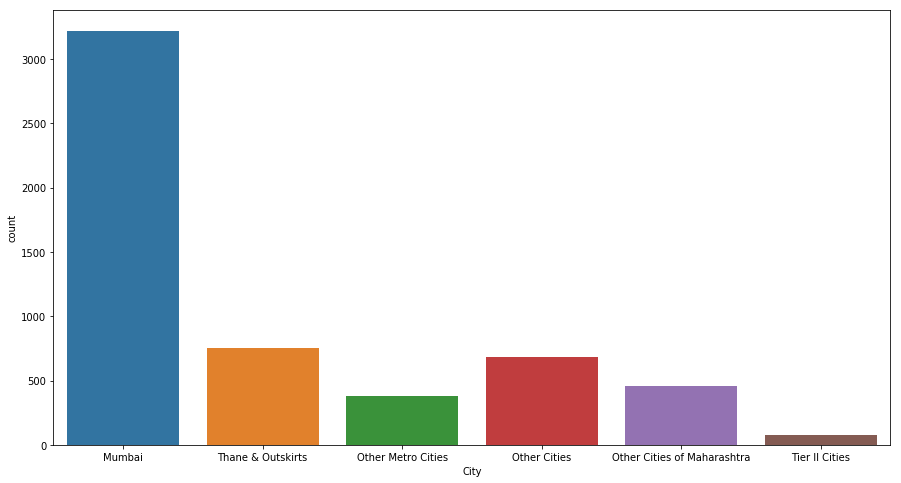

In [957]:
# City

plt.figure(figsize=(15,8))
sns.countplot(leads.City)

#It can be seen almost 3222/5571 = 58% values are Mumbai

In [958]:
# Let us now look at country where city is Null

leads.Country[leads['City'].isnull()].value_counts()

#it can be seen most cases where City is Null the Country is India.
# hence it can be assumed those are mumbai given 58% of values in city is Mumbai
# There we will impute City value as Mumbai, where country is India

India                   1554
United States             18
United Arab Emirates       9
Singapore                  7
unknown                    5
United Kingdom             3
Qatar                      2
Sweden                     2
Australia                  2
Asia/Pacific Region        2
South Africa               1
Canada                     1
Uganda                     1
China                      1
Russia                     1
Oman                       1
Ghana                      1
Italy                      1
Hong Kong                  1
Sri Lanka                  1
Name: Country, dtype: int64

In [959]:
# Replacing value of City to Mumbai where City is Null and Country is India 
# Replacing value of City to Other Cities where City and Country is Null

leads.City.loc[(leads['City'].isnull()) & (leads['Country']=='India')] = "Mumbai"
leads.City.loc[(leads['City'].isnull()) & (leads['Country']!='India')] = "Other Cities"

In [960]:
# City

leads.City.isnull().sum()

# there are no Null values in City

0

In [961]:
# Country

leads.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

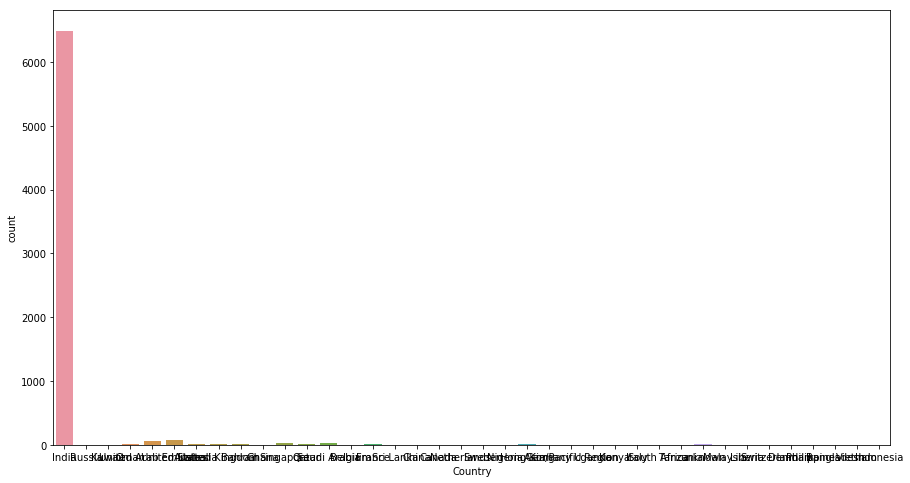

In [962]:
# Country

plt.figure(figsize=(15,8))
sns.countplot(leads.Country)

#It can be seen almost every items is India

In [963]:
# Let us now look at City where country is Null

leads.City[leads['Country'].isnull()].value_counts()

#given 95% of Country is India it is presumed 'Other Cities' and other values below have country as India

Other Cities                   2110
Mumbai                          211
Thane & Outskirts                80
Other Cities of Maharashtra      43
Other Metro Cities               15
Tier II Cities                    2
Name: City, dtype: int64

In [964]:
# imputing instances wihere Country is NaN as India

leads.Country.loc[leads['Country'].isnull()] = "India"

In [965]:
# Country

leads.Country.describe()

# checking after replacing
# Since most items is India can be considered for dropping

count      9240
unique       38
top       India
freq       8953
Name: Country, dtype: object

In [966]:
# Specialization

leads.Specialization.value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

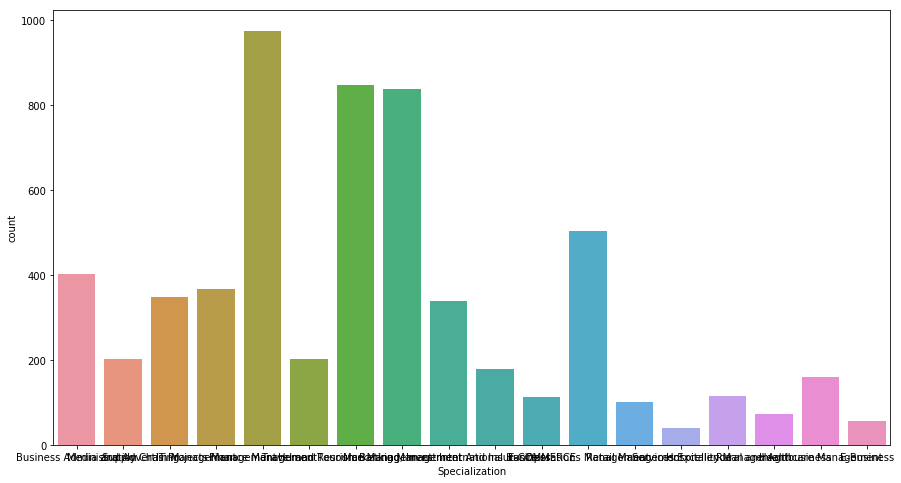

In [967]:
# Country

plt.figure(figsize=(15,8))
sns.countplot(leads.Specialization)


In [968]:
# There is no specific trend, hence it is assumed in the lead form the option was not available hence none was selected
# therefore imputing Specialisation whose value is NaN as "Others"

In [969]:
# imputing instances wihere Country is NaN as India

leads.Specialization.loc[leads['Specialization'].isnull()] = "Others"

In [970]:
# inspecting columns with Null Values
# gives the % of column wise null values of dataframe 
round(100*leads.isnull().sum()/len(leads.index),2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [971]:
# What is your current occupation

leads['What is your current occupation'].describe()



count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [972]:
# What is your current occupation

leads['What is your current occupation'].value_counts()

#Around 85% is unemployed. Hence, we assume the NaN are also unemployed. 

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [973]:
# imputing instances where 'What is your current occupation' is NaN as unemployed

leads['What is your current occupation'].loc[leads['What is your current occupation'].isnull()] = "Unemployed"

In [974]:
# What is your current occupation

leads['What is your current occupation'].describe()

# After imputing

count           9240
unique             6
top       Unemployed
freq            8290
Name: What is your current occupation, dtype: object

In [975]:
# What matters most to you in choosing a course

leads['What matters most to you in choosing a course'].describe()



count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [976]:
#What matters most to you in choosing a course

leads['What matters most to you in choosing a course'].value_counts()

#Around 99% is Better Career Prospects, hence imputing the same where it is NaN

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [977]:
# imputing instances where 'What matters most to you in choosing a course' is NaN as 'Better Career Prospects'

leads['What matters most to you in choosing a course'].loc[leads['What matters most to you in choosing a course'].isnull()] = "Better Career Prospects"


In [978]:
# What is your current occupation

leads['What matters most to you in choosing a course'].describe()

#after imputing


count                        9240
unique                          3
top       Better Career Prospects
freq                         9237
Name: What matters most to you in choosing a course, dtype: object

In [979]:
# Tags
#Tags assigned to customers indicating the current status of the lead.

leads['Tags'].describe()



count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [980]:
# Tags

leads['Tags'].value_counts()

#Around 35% is Will revert after reading the email 
# given this is filled based on the assessment of Sales Team
# we presume that NaN means the lead "Will Revert"
# Hence, imputing Nan as "Will revert after reading the email"


Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [981]:
# imputing instances where 'Tags' is NaN as 'Will revert after reading the email'

leads['Tags'].loc[leads['Tags'].isnull()] = "Will revert after reading the email"


In [982]:
# Tags
#Tags assigned to customers indicating the current status of the lead.

leads['Tags'].describe()

#after imputing

count                                    9240
unique                                     26
top       Will revert after reading the email
freq                                     5425
Name: Tags, dtype: object

In [983]:
# Lead Quality

leads['Lead Quality'].describe()



count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

In [984]:
# Lead Quality

leads['Lead Quality'].value_counts()

# it can be assumed that NaN means "Not Sure"

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [985]:
# imputing instances where 'Lead Quality' is NaN as 'Not Sure'

leads['Lead Quality'].loc[leads['Lead Quality'].isnull()] = "Not Sure"


In [986]:
# inspecting columns with Null Values
# gives the % of column wise null values of dataframe 
round(100*leads.isnull().sum()/len(leads.index),2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [987]:
# Asymmetrique Activity Index 
# Asymmetrique Profile Index  
# Asymmetrique Activity Score   
# Asymmetrique Profile Score 

#   An index and score assigned to each customer based on their activity and their profile

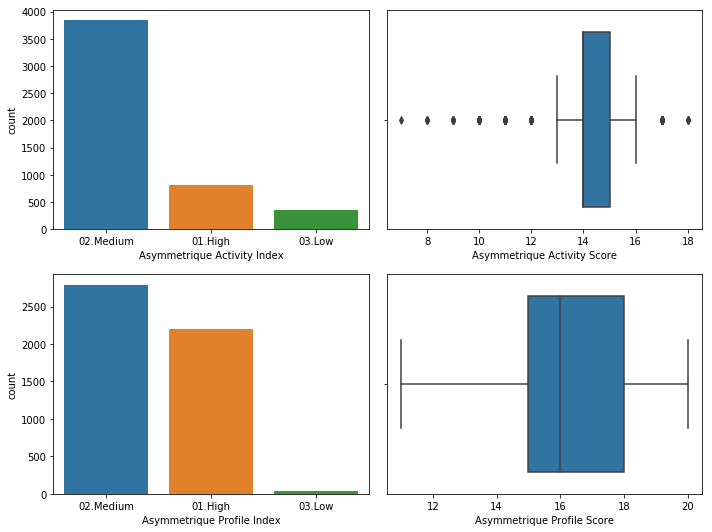

In [988]:
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(leads['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(leads['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(leads['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(leads['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

In [989]:
# looking at key Statistics
leads[['Asymmetrique Profile Score','Asymmetrique Activity Score']].describe()

,Asymmetrique Profile Score,Asymmetrique Activity Score
count,5022.000000,5022.000000
mean,16.344883,14.306252
std,1.811395,1.386694
min,11.000000,7.000000
25%,15.000000,14.000000
50%,16.000000,14.000000
75%,18.000000,15.000000
max,20.000000,18.000000


In [990]:
# given the nature of values, it may not be possible for meaningfully impute any values
# given 45% is NaN it will not be suitable for meaningful anaysis with NaN
# hence, it is better we drop these columns

In [991]:
leads.drop(['Asymmetrique Activity Index'
,'Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],axis = 1, inplace = True)

In [992]:
# inspecting columns with Null Values
# gives the % of column wise null values of dataframe 
round(100*leads.isnull().sum()/len(leads.index),2)


Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [993]:
# Lead Quality

leads['TotalVisits'].describe()

# we can impute the blank with 50% Percentile value which is 3


count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [994]:
# imputing instances where 'Lead Quality' is NaN as 'Not Sure'

leads['TotalVisits'].loc[leads['TotalVisits'].isnull()] = 3


In [995]:
# Lead Quality

leads['TotalVisits'].describe()

# after imputing


count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [996]:
# Last Activity

leads['Last Activity'].value_counts()

# it will be difficult to meaninfully impute any value. Given it is only around 1% better to drop the rows

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [997]:
#LeadSource

leads['Lead Source'].value_counts()

# it will be difficult to meaninfully impute any value. Given it is only around 0.4% better to drop the rows

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
testone                 1
NC_EDM                  1
blog                    1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [998]:
leads.shape

(9240, 31)

In [999]:
# Rest missing values  so we can drop these rows.
leads.dropna(inplace = True)

In [1000]:
# inspecting columns with Null Values
# gives the % of column wise null values of dataframe 
round(100*leads.isnull().sum()/len(leads.index),2)


Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [1001]:
leads.shape

(9074, 31)

# Exploratory Data Analysis
### Univariate and Bivariate Analysis

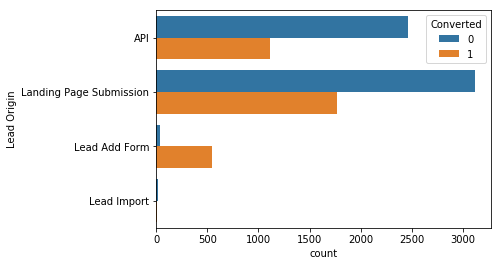

In [1002]:
# Lead Origin
sns.countplot(y = "Lead Origin", hue = "Converted", data = leads)


In [1003]:
#Lead Origin
# Conversion for API and Landing Page Submission is only around 30%
# Conversion for Lead Add form is very high although overall volumes is very less

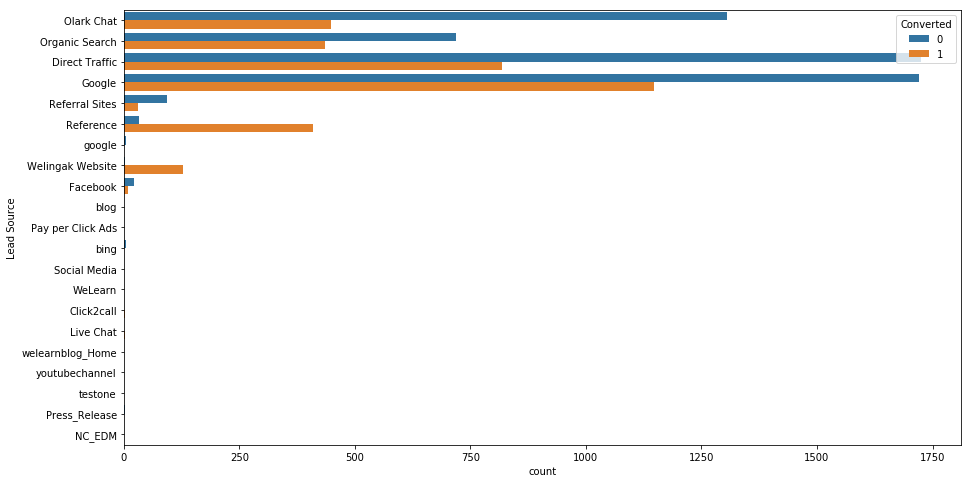

In [1004]:
# Lead Source
plt.figure(figsize=(15,8))
sns.countplot(y = "Lead Source", hue = "Converted", data = leads)


In [1005]:
# Google is appearing twice
# also many such as blog, pay per click, bong, etc., have very numbers and hence can be clubbed

leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')
leads['Lead Source'] = leads['Lead Source'].replace([['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2call','Live Chat','Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM']], 'Other Sources')
                                                   
                                                     


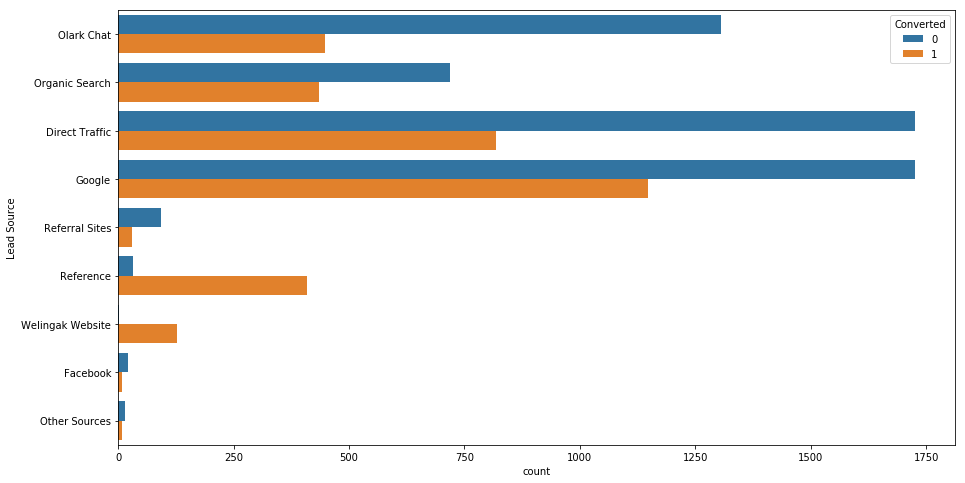

In [1006]:
# Lead Source
plt.figure(figsize=(15,8))
sns.countplot(y = "Lead Source", hue = "Converted", data = leads)


In [1007]:
#Lead Origin
#Most of the source of lead is from Direct and Google
# Reference leads have very high conversion leads
# Wellingak website also has very high conversion leads but number of leads are low


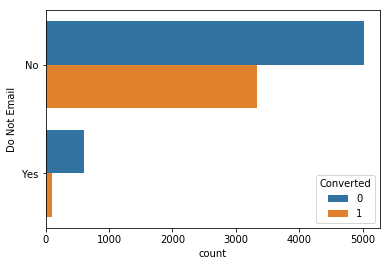

In [1008]:
# Do Not Email
sns.countplot(y = "Do Not Email", hue = "Converted", data = leads)


In [1009]:
# People who have not opted for Do Not email seem to have a better conversion rate

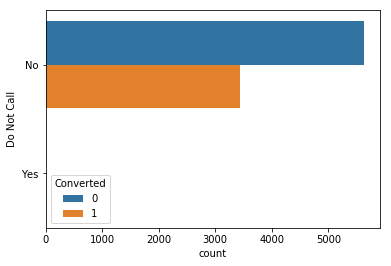

In [1010]:
# Do Not Call
sns.countplot(y = "Do Not Call", hue = "Converted", data = leads)


In [1011]:
# People who have not opted for Do Not Call seem to have a better conversion rate

In [1012]:
#TotalVisits

leads.TotalVisits.describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

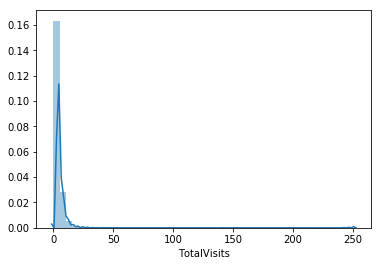

In [1013]:
# Histogram for Total Visits

sns.distplot(leads.TotalVisits)

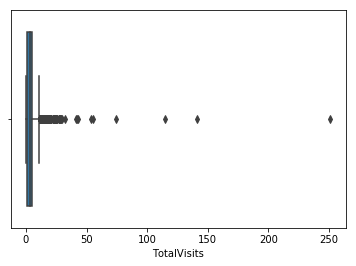

In [1014]:
# Box plots for Total Visits

sns.boxplot(leads.TotalVisits)

# can be seen from above there are lot of outliers and need adjustment

In [1015]:
#Outlier Adjustment 2% - 95%


percentiles = leads['TotalVisits'].quantile([0.02,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]



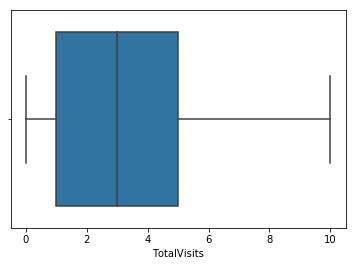

In [1016]:
#Viewing the boxplot after Adjusting for outliers in Total Visits

sns.boxplot(leads.TotalVisits)

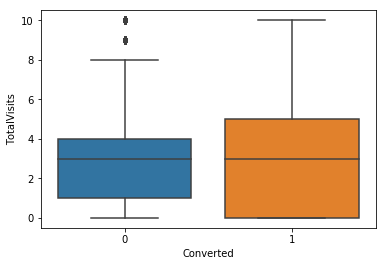

In [1017]:
#Box Plot based on Total Visits with Conversion

sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)



In [1018]:
# Nothing specific based on total visits as in converted they spend less visits and more visits
# mean of both are similar but Upper and Lower range is wider in converted as compared to not converted

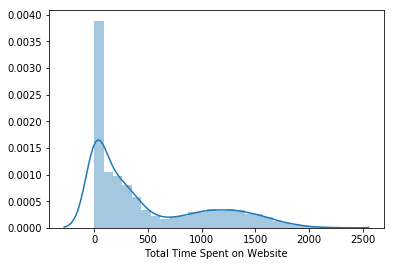

In [1019]:
# Histogram for Total Time Spent on Website

sns.distplot(leads['Total Time Spent on Website'])

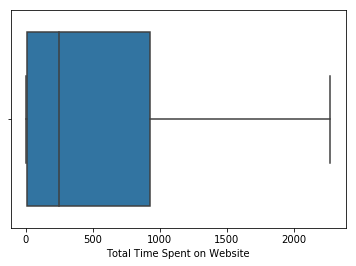

In [1020]:
# Box plots for 'Total Time Spent on Website'

sns.boxplot(leads['Total Time Spent on Website'])



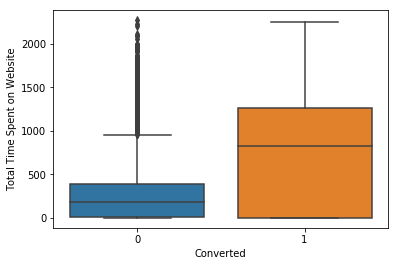

In [1021]:
#Box Plot based on 'Total Time Spent on Website' along with Conversion

sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)



In [1022]:
# 'Total Time Spent on Website' 
# It appears that anyone spending more time on website is likely to convert
# Lot of outliers in not converted, which means there are instances where people spendtime on website and still didnt convert



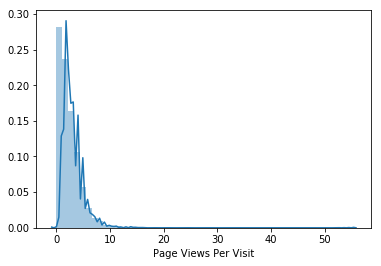

In [1023]:
# Histogram for Page Views Per Visit

sns.distplot(leads['Page Views Per Visit'])

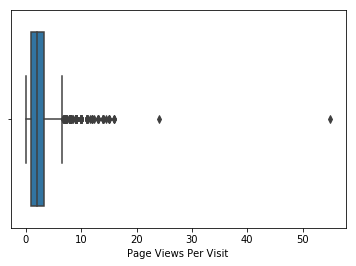

In [1024]:
# Box plots for 'Pageviews'

sns.boxplot(leads['Page Views Per Visit'])

# can be seen from above there are lot of outliers and need adjustment

In [1025]:
#Page Views Per Visit statistics

leads['Page Views Per Visit'].describe()



count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [1026]:
#Outlier Adjustment 2% - 95%

percentiles = leads['Page Views Per Visit'].quantile([0.02,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]




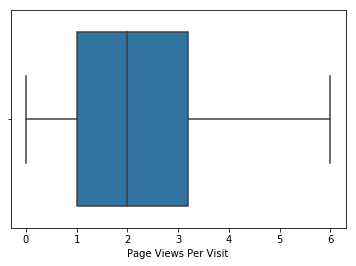

In [1027]:
# Box plots for 'Pageviews'

sns.boxplot(leads['Page Views Per Visit'])

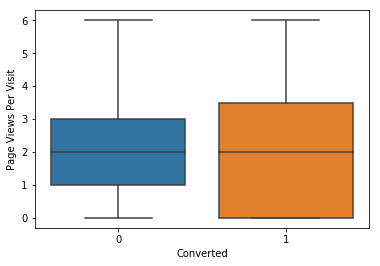

In [1028]:
#Box Plot based on 'Page Views Per Visit' along with Conversion

sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)



In [1029]:
#'Page Views Per Visit' 
# They are very similar not much can be concluded

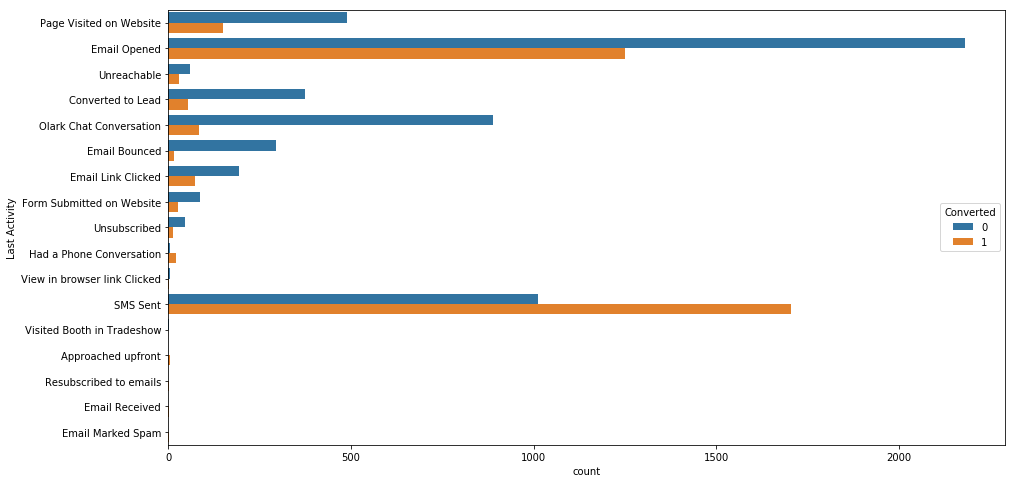

In [1030]:
# Last Activity


plt.figure(figsize=(15,8))
sns.countplot(y = "Last Activity", hue = "Converted", data = leads)

# There are many without much transactions and they can be clubbed to Others

In [1031]:


# There are many without much transactions and they can be clubbed to Others

leads["Last Activity"] = leads["Last Activity"].replace([['Had a Phone Conversation','Views in browser link Cllicked','Visited Booth in Tradeshow','Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam','View in browser link Clicked']], 'Other Sources')
                                                   
                                                     


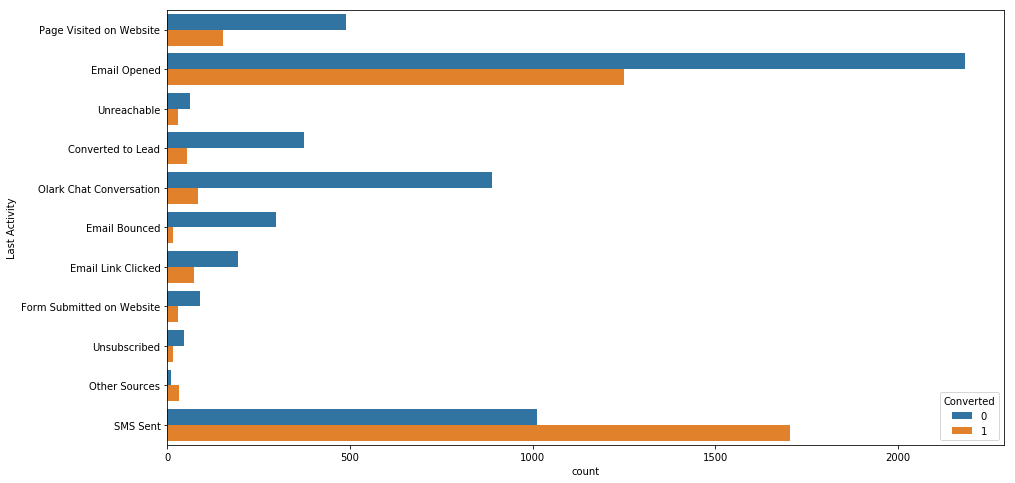

In [1032]:
# Last Activity after cleaning


plt.figure(figsize=(15,8))
sns.countplot(y = "Last Activity", hue = "Converted", data = leads)

In [1033]:
# SMS has the maximum convertion
# Email opened has lot of transactions but the converstion rate is around 30%
# most of the others have a poor converstion ratio

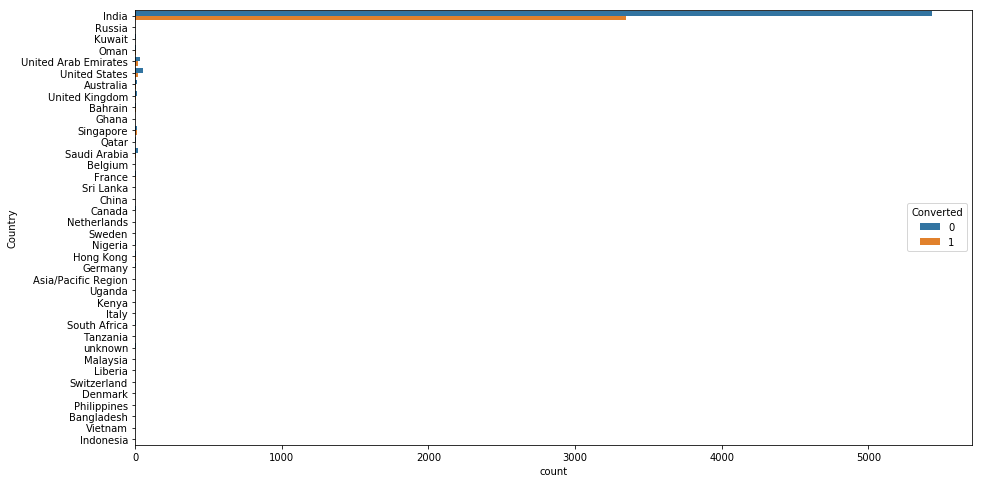

In [1034]:
# Country


plt.figure(figsize=(15,8))
sns.countplot(y = "Country", hue = "Converted", data = leads)

# All Most all are from India
# no further meaningful conclusion can be drawn
# can be removed

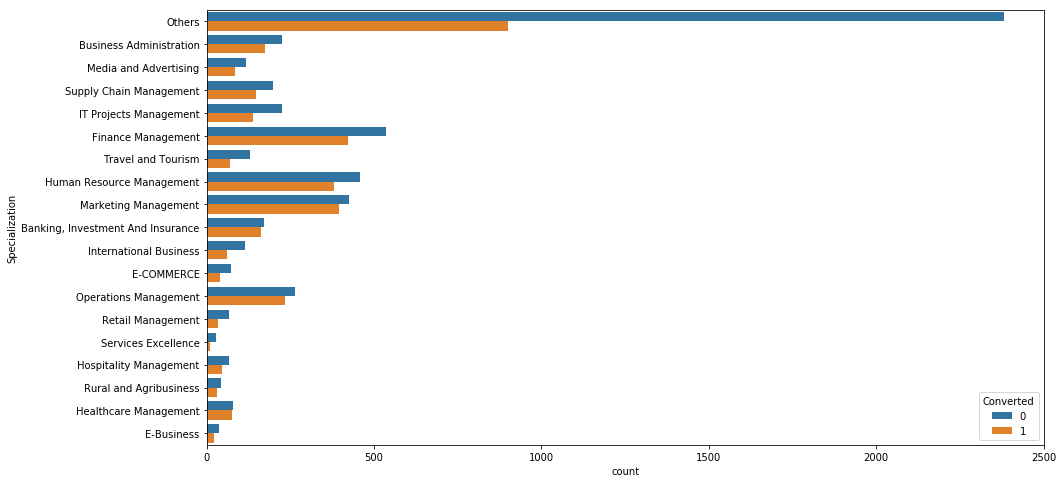

In [1035]:
# Specialization


plt.figure(figsize=(15,8))
sns.countplot(y = "Specialization", hue = "Converted", data = leads)



In [1036]:
# Not much expect the Others category is the maximum, while many specilization have good converstion ratio

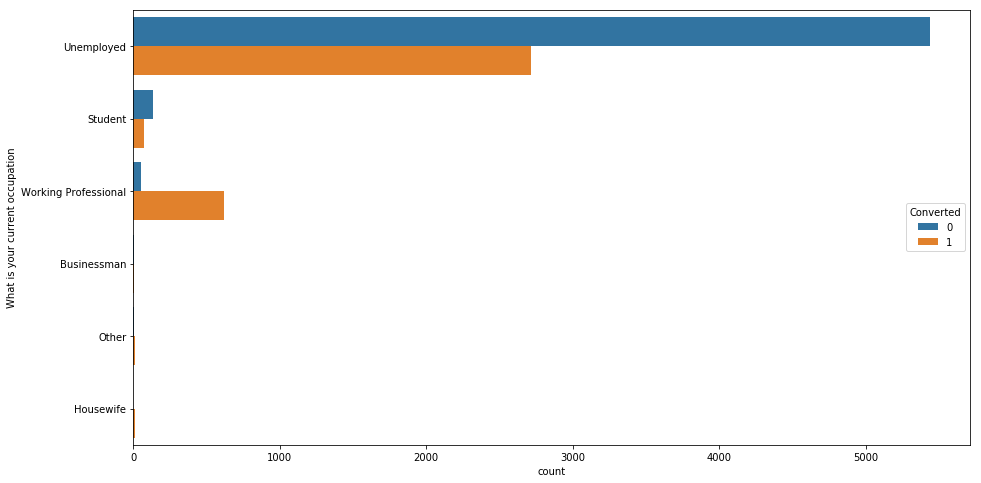

In [1037]:
# What is your current occupation


plt.figure(figsize=(15,8))
sns.countplot(y = "What is your current occupation", hue = "Converted", data = leads)

# All Most all are from India
# no further meaningful conclusion can be drawn

In [1038]:
# There are many without much transactions and they can be clubbed to Other Occupation

leads["What is your current occupation"] = leads["What is your current occupation"].replace([['Businessman','Other','Housewife']], 'Other Occupation')
                                                   
                      

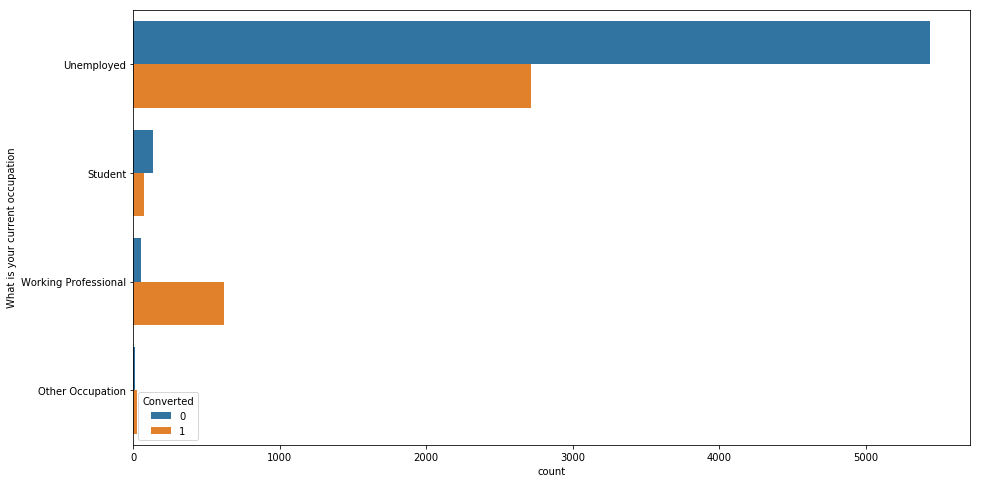

In [1039]:
# What is your current occupation


plt.figure(figsize=(15,8))
sns.countplot(y = "What is your current occupation", hue = "Converted", data = leads)



In [1040]:
# The maximum people enquiring are unemployed
# Working Professionals are most likely to join

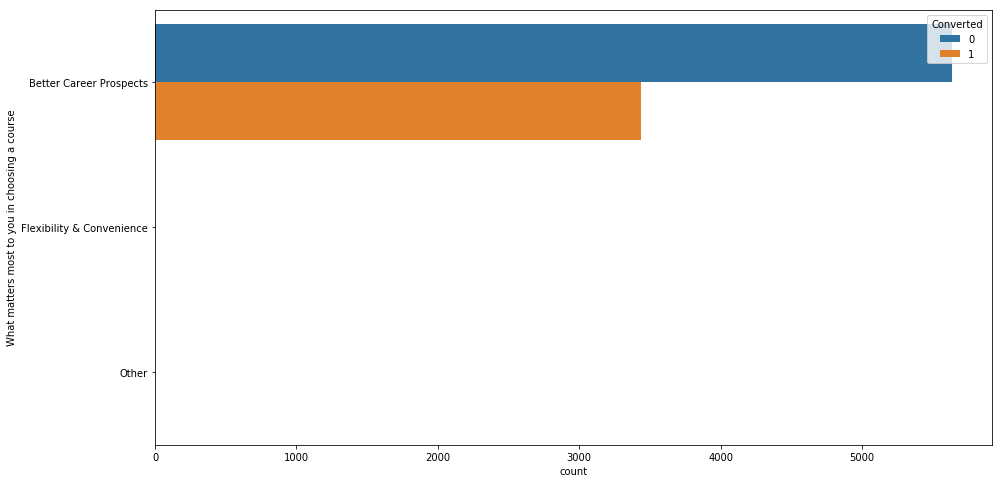

In [1041]:
# What matters most to you in choosing a course 


plt.figure(figsize=(15,8))
sns.countplot(y = "What matters most to you in choosing a course", hue = "Converted", data = leads)



In [1042]:
# Almost everyone joins for better career prospects
# can be removed

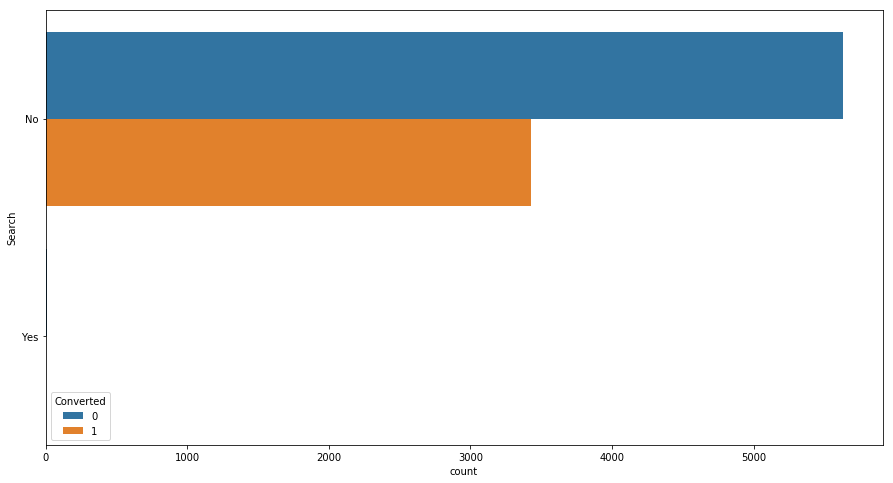

In [1043]:
# Search 


plt.figure(figsize=(15,8))
sns.countplot(y = "Search", hue = "Converted", data = leads)



In [1044]:
# Not much can be seen, given most entreies are No
# can be removed

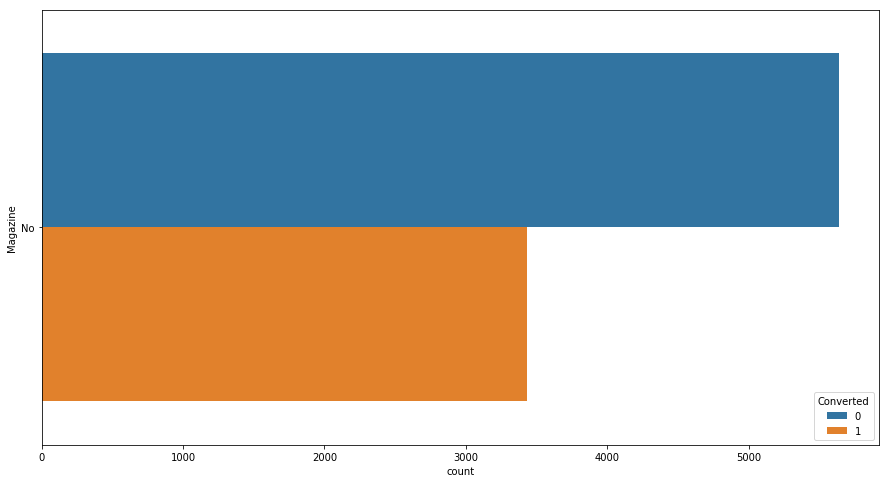

In [1045]:
# Magazine


plt.figure(figsize=(15,8))
sns.countplot(y = "Magazine", hue = "Converted", data = leads)



In [1046]:
# Not much can be seen, given All entries are No
# can be removed

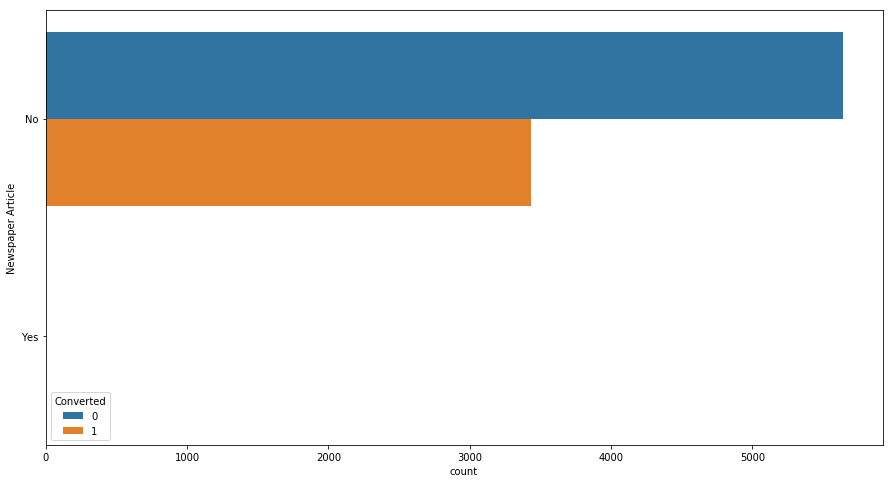

In [1047]:
# Newspaper Article


plt.figure(figsize=(15,8))
sns.countplot(y = "Newspaper Article", hue = "Converted", data = leads)



In [1048]:
# Not much can be seen, given All entries are No
# can be removed

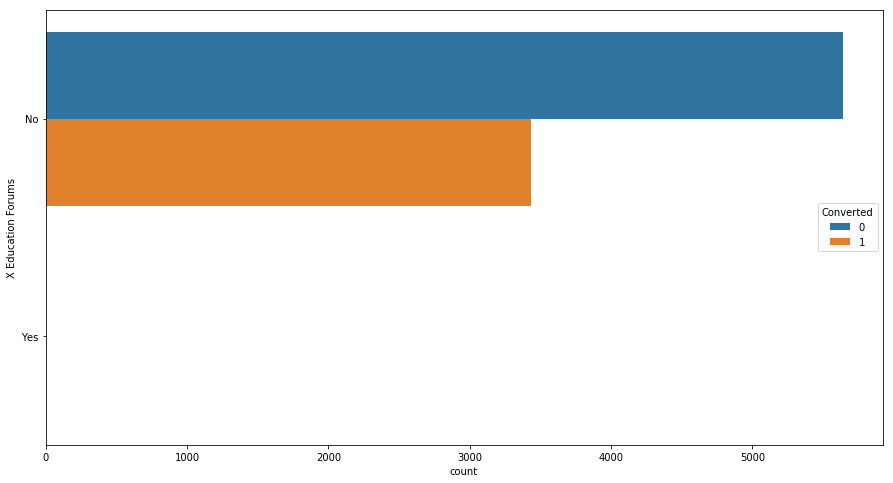

In [1049]:
# X Education Forums 


plt.figure(figsize=(15,8))
sns.countplot(y = "X Education Forums", hue = "Converted", data = leads)



In [1050]:
# Not much can be seen, given All entries are No
# can be removed

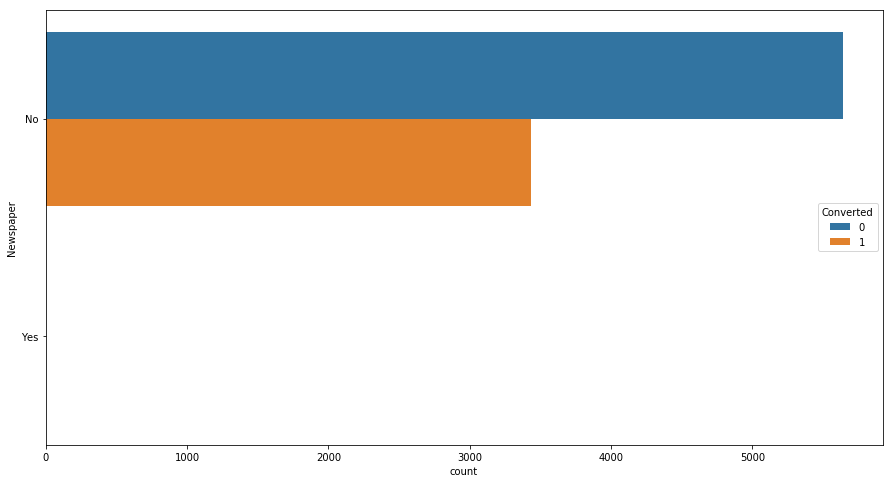

In [1051]:
# Newspaper 


plt.figure(figsize=(15,8))
sns.countplot(y = "Newspaper", hue = "Converted", data = leads)



In [1052]:
# Not much can be seen, given All entries are No
# can be removed

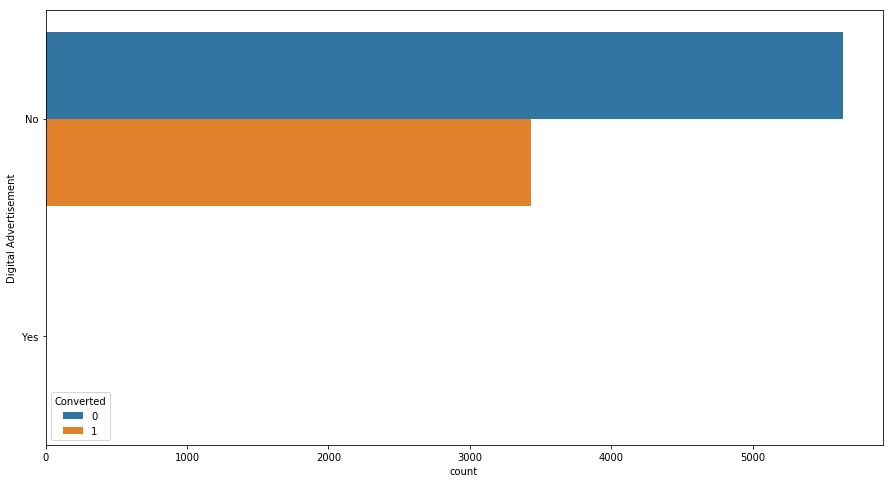

In [1053]:
# Digital Advertisement


plt.figure(figsize=(15,8))
sns.countplot(y = "Digital Advertisement", hue = "Converted", data = leads)



In [1054]:
# Not much can be seen, given All entries are No
# can be removed

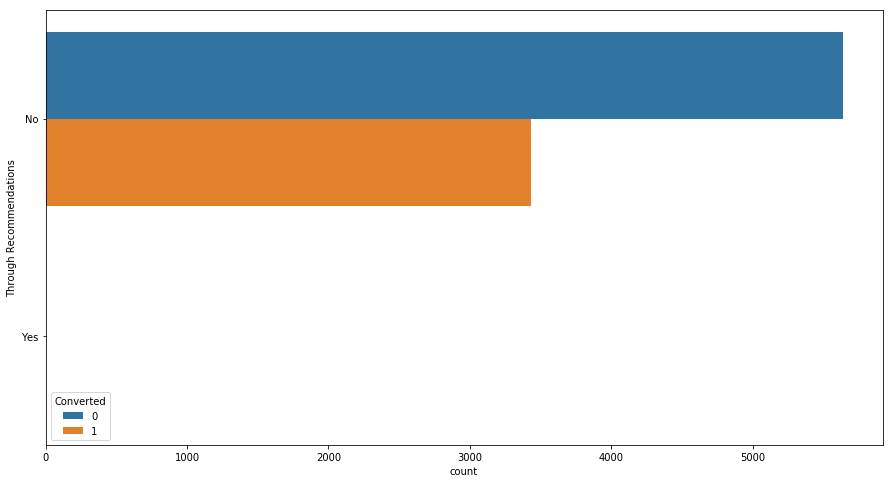

In [1055]:
# Digital Advertisement


plt.figure(figsize=(15,8))
sns.countplot(y = "Through Recommendations", hue = "Converted", data = leads)



In [1056]:
# Not much can be seen, given All entries are No
# can be removed

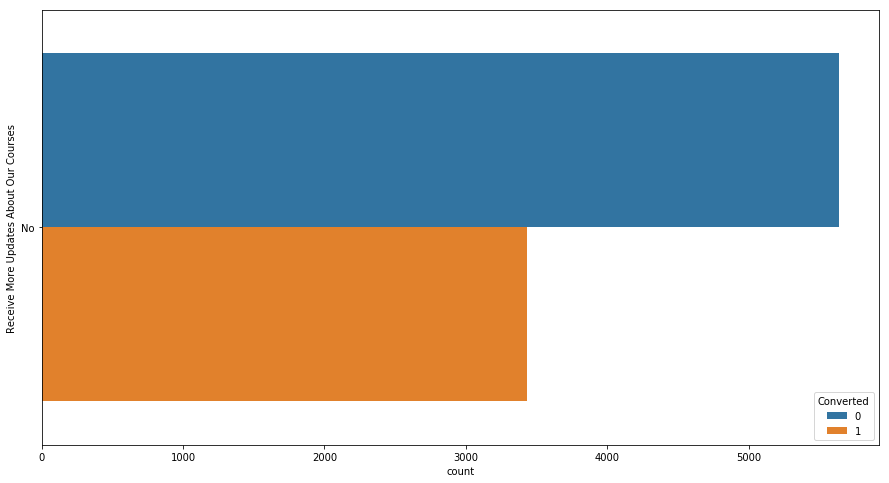

In [1057]:
# Receive More Updates About Our Courses


plt.figure(figsize=(15,8))
sns.countplot(y = "Receive More Updates About Our Courses", hue = "Converted", data = leads)



In [1058]:
# Not much can be seen, given All entries are No
# can be removed

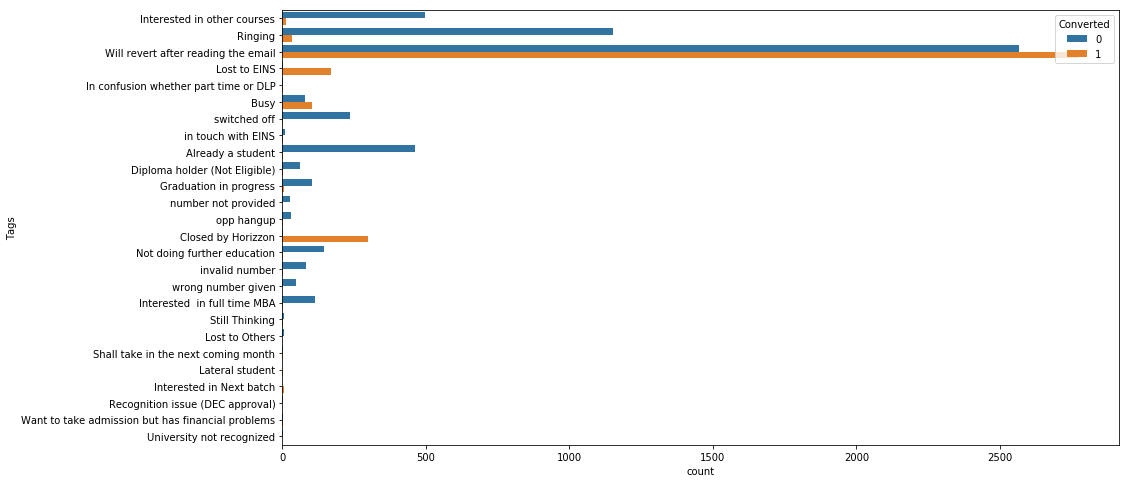

In [1059]:
# Tags


plt.figure(figsize=(15,8))
sns.countplot(y = "Tags", hue = "Converted", data = leads)



In [1060]:
# There are many without much transactions and they can be clubbed to Other Tags

leads["Tags"] = leads["Tags"].replace([['Lost to Others','in touch with EINS','Still Thinking','In confusion whether part time or DLP','Interested in Next batch','Want to take admission but has financial problems','Lateral student','University not recognized','Shall take in the next coming month','Recognition issue (DEC approval)']], 'Other Tags')
                                                   
                      

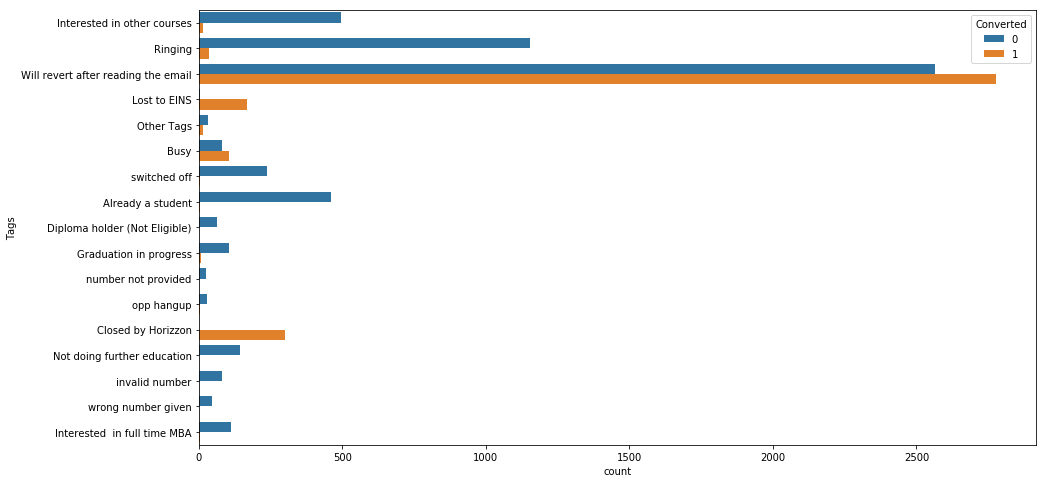

In [1061]:
# Tags


plt.figure(figsize=(15,8))
sns.countplot(y = "Tags", hue = "Converted", data = leads)



In [1062]:
# Can be seen the Will revert to email has high conversion ratio

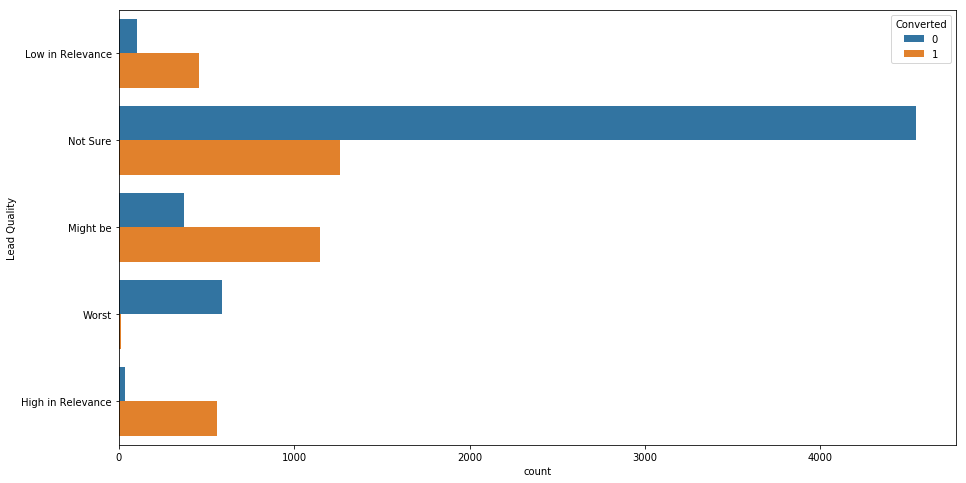

In [1063]:
# Lead Quality


plt.figure(figsize=(15,8))
sns.countplot(y = "Lead Quality", hue = "Converted", data = leads)



In [1064]:
# Not sure has number of leads and 20% conversion ratio. Might be has a high conversion ratio, including low relevance

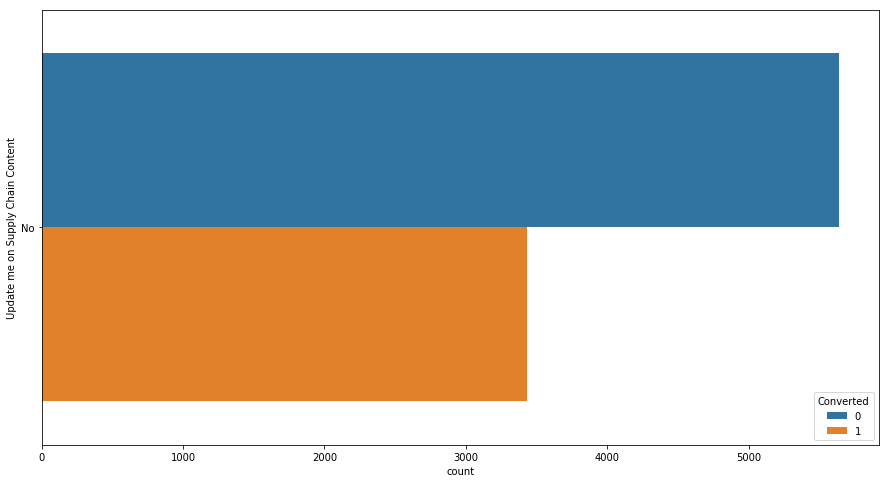

In [1065]:
# Update me on Supply Chain Content


plt.figure(figsize=(15,8))
sns.countplot(y = "Update me on Supply Chain Content", hue = "Converted", data = leads)



In [1066]:
# Not much can be seen, given All entries are No
# can be removed

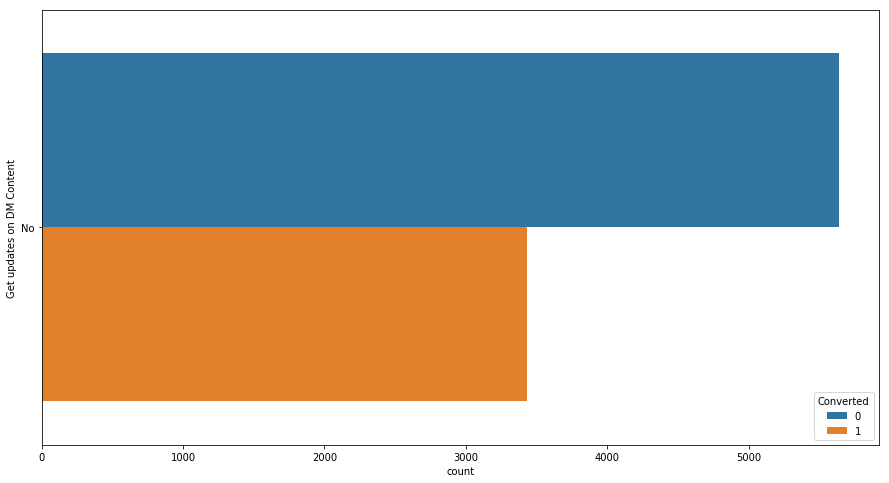

In [1067]:
# Get updates on DM Content


plt.figure(figsize=(15,8))
sns.countplot(y = "Get updates on DM Content", hue = "Converted", data = leads)



In [1068]:
# Not much can be seen, given All entries are No
# can be removed

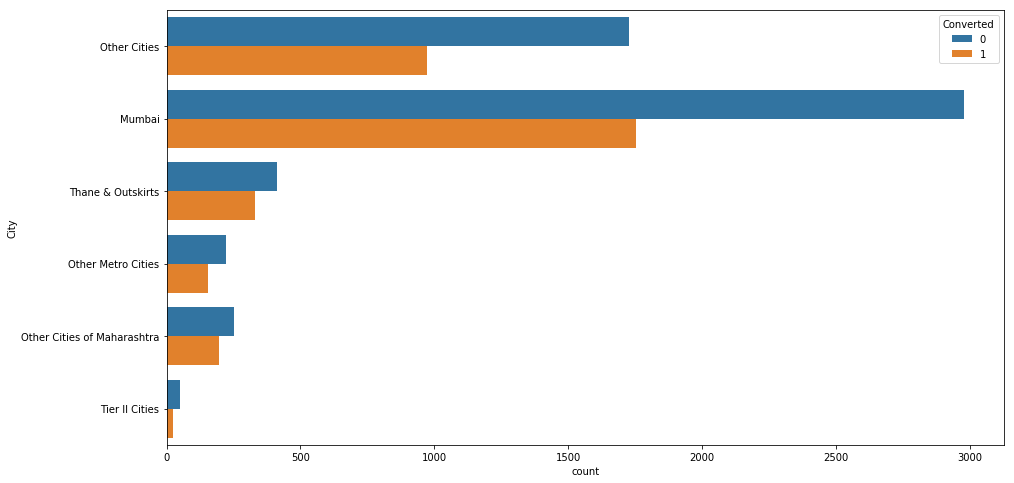

In [1069]:
# City


plt.figure(figsize=(15,8))
sns.countplot(y = "City", hue = "Converted", data = leads)



In [1070]:
# Mumbai maximum leads and good conversion ratio

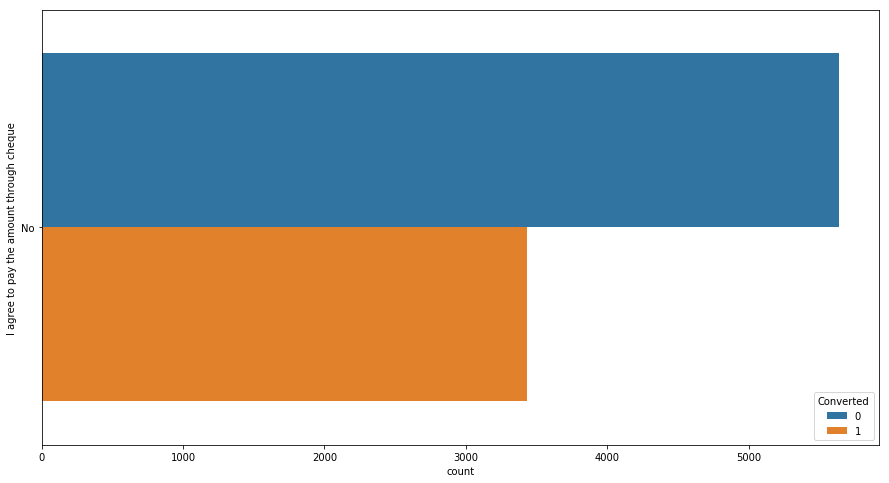

In [1071]:
# I agree to pay the amount through cheque


plt.figure(figsize=(15,8))
sns.countplot(y = "I agree to pay the amount through cheque", hue = "Converted", data = leads)



In [1072]:
# Not much can be seen, given All entries are No
# can be removed

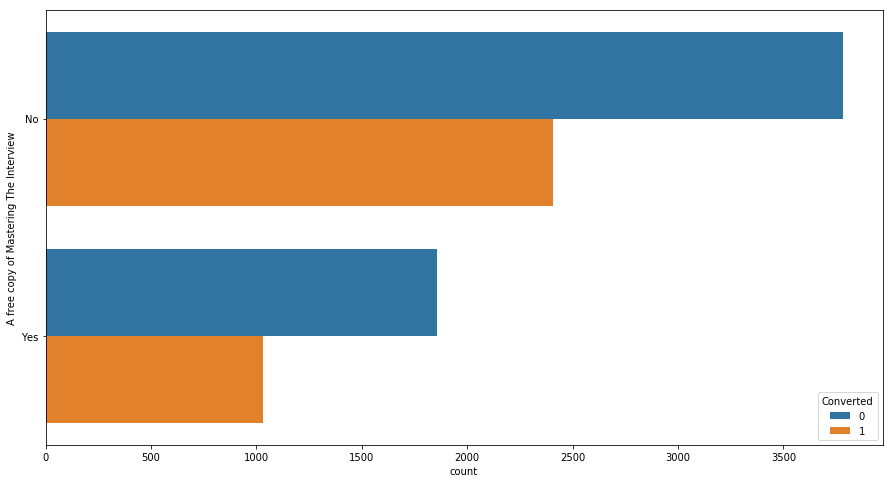

In [1073]:
# A free copy of Mastering The Interview


plt.figure(figsize=(15,8))
sns.countplot(y = "A free copy of Mastering The Interview", hue = "Converted", data = leads)



In [1074]:
# Most are NO and very few are yes and ratio is no different from No. Hence
# Can be removed

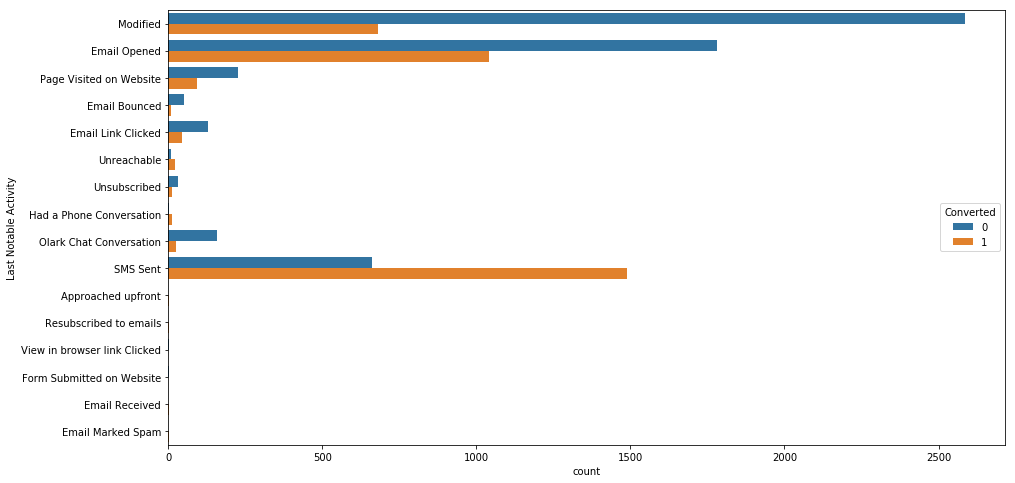

In [1075]:
#Last Notable Activity 
plt.figure(figsize=(15,8))
sns.countplot(y = "Last Notable Activity", hue = "Converted", data = leads)



In [1076]:
# There are many without much transactions and they can be clubbed to Other Last Activity

leads["Last Notable Activity"] = leads["Last Notable Activity"].replace([['View in browser link Clicked','Approached upfront','Resubscribed to emails','Email Received','Form Submitted on Website','Email Marked Spam','Lateral student','Had a Phone Conversation']], 'Other Notableactivity')
                                                   
                      

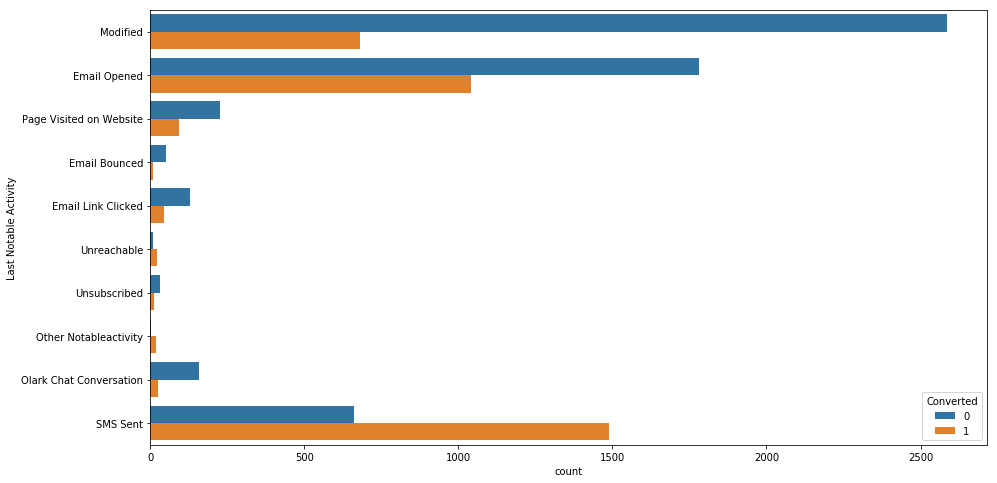

In [1077]:
#Last Notable Activity 
plt.figure(figsize=(15,8))
sns.countplot(y = "Last Notable Activity", hue = "Converted", data = leads)



In [1078]:
# Again SMS has great conversion
# Modified and EMail has most leads

In [1079]:
# Based on EDA the following Columns do not add value and can be removed
#"A free copy of Mastering The Interview"
#"I agree to pay the amount through cheque"
#"Get updates on DM Content"
#"Update me on Supply Chain Content"
#"Receive More Updates About Our Courses"
#"Through Recommendations"
#"Digital Advertisement"
#"Newspaper"
#"X Education Forums"
#"Newspaper Article"
#"Magazine"
#"Search"
#"What matters most to you in choosing a course"
#"Country"


In [1080]:
# inspecting shape before dropping
leads.shape

(9074, 31)

In [1081]:
#dropping unwanted columns as per above

leads = leads.drop(["Country","A free copy of Mastering The Interview","I agree to pay the amount through cheque","Get updates on DM Content","Update me on Supply Chain Content","Receive More Updates About Our Courses","Through Recommendations","Digital Advertisement","Newspaper","X Education Forums","Newspaper Article","Magazine","Search","What matters most to you in choosing a course"],1)



In [1082]:
# inspecting shape after dropping
leads.shape

(9074, 17)

In [1083]:
# inspecting shape after dropping
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Other Cities,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


# Data Preperation


In [1084]:
# Converting the  Yes to 1 and No to 0
leads['Do Not Call'] = leads['Do Not Call'].map({'Yes': 1, 'No': 0})
leads['Do Not Email'] = leads['Do Not Email'].map({'Yes': 1, 'No': 0})

In [1085]:
# inspecting
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Other Cities,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [1086]:
# Creating a dummy variable for the variable 'Last Activity' and dropping the first one.
dum1 = pd.get_dummies(leads['Last Activity'],prefix='lastactivity',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dum1],axis=1)


# Creating a dummy variable for the variable 'Specialization' and dropping the first one.
dum3 = pd.get_dummies(leads['Specialization'],prefix='Specialization',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dum3],axis=1)

# Creating a dummy variable for the variable 'What is your current occupation' and dropping the first one.
dum4 = pd.get_dummies(leads['What is your current occupation'],prefix='occupation',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dum4],axis=1)


# Creating a dummy variable for the variable 'Tags' and dropping the first one.
dum5 = pd.get_dummies(leads['Tags'],prefix='Tags',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dum5],axis=1)

# Creating a dummy variable for the variable 'Lead Quality' and dropping the first one.
dum6 = pd.get_dummies(leads['Lead Quality'],prefix='LeadQuality',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dum6],axis=1)

# Creating a dummy variable for the variable 'City' and dropping the first one.
dum7 = pd.get_dummies(leads['City'],prefix='city',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dum7],axis=1)
                            
 # Creating a dummy variable for the variable 'Last Notable Activity' and dropping the first one.
dum8 = pd.get_dummies(leads['Last Notable Activity'],prefix='Lastnoteableactivity',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dum8],axis=1)
                            
   
                            
 # Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
dum9 = pd.get_dummies(leads['Lead Origin'],prefix='LeadOrigin',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dum9],axis=1)

                            
 # Creating a dummy variable for the variable 'Lead Lead Source' and dropping the first one.
dum10 = pd.get_dummies(leads['Lead Source'],prefix='LeadSource',drop_first=True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dum10],axis=1)




In [1087]:
#Dropping Columns converted to dummy

leads = leads.drop(['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','Lead Quality','Last Notable Activity','City'],axis=1)



In [1088]:
# inspecting
leads.shape

(9074, 84)

In [1089]:
# inspecting
leads.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,lastactivity_Email Bounced,lastactivity_Email Link Clicked,...,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Other Sources,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,0,1,0,0,0,0,0,0


# Checking for Outliers

In [1090]:
# Checking for outliers in the continuous variables
num_leads = leads[['Page Views Per Visit','Total Time Spent on Website','TotalVisits']]


In [1091]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_leads.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Page Views Per Visit,Total Time Spent on Website,TotalVisits
count,9074.000000,9074.000000,9074.000000
mean,2.265943,482.887481,3.191867
std,1.790991,545.256560,2.780618
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,2.000000,246.000000,3.000000
75%,3.200000,922.750000,5.000000
90%,5.000000,1373.000000,7.000000
95%,6.000000,1557.000000,10.000000
99%,6.000000,1839.000000,10.000000


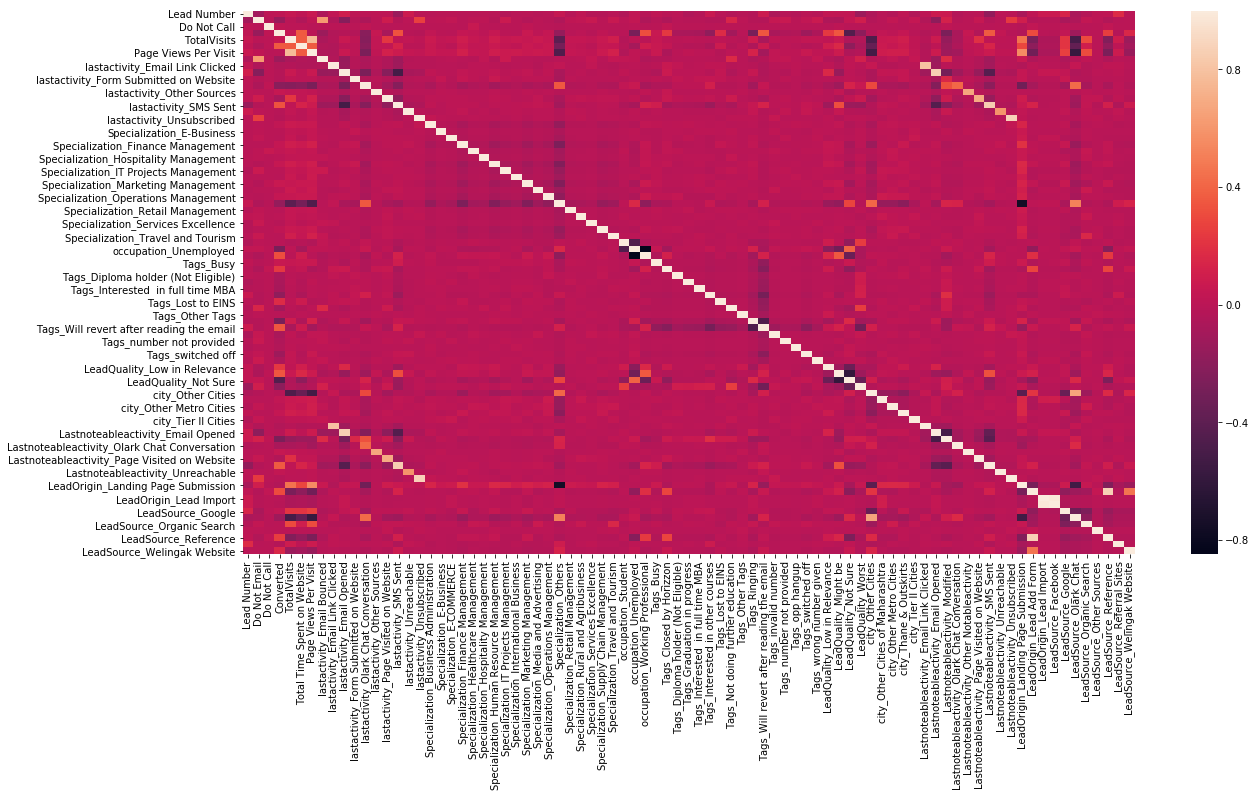

In [1092]:
#Correlation

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads.corr())
plt.show()

# Test and Train Split

In [1093]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = leads.drop(['Prospect ID','Lead Number','Converted'],axis=1)

# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1094]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Feature Scaling


In [1095]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,lastactivity_Email Bounced,lastactivity_Email Link Clicked,lastactivity_Email Opened,lastactivity_Form Submitted on Website,lastactivity_Olark Chat Conversation,...,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Other Sources,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website
3009,0,0,-0.432779,-0.160255,-0.155018,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7987,0,0,0.643547,2.017593,0.122613,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1096]:
# Checking the Converstion Rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

37.85541106458012

# Model Building

In [1097]:
import statsmodels.api as sm

In [1098]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6269
Model Family:                Binomial   Df Model:                           81
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1245.4
Date:                Sun, 09 Jun 2019   Deviance:                       2490.8
Time:                        19:10:01   Pearson chi2:                 3.92e+04
No. Iterations:                    24   Covariance Type:             nonrobust
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            2.5249      1.717      1.471      0.141      -0.840       5.890
Do Not Email                                    -1.3628      0.331     -4.114      0.000      -2.012      -0.714
Do Not Call                                     23.6795   1.37e+05      0.000      1.000   -2.69e+05    2.69e+05
TotalVisits                                      0.1926      0.087      2.207      0.027       0.022       0.364
Total Time Spent on Website                      1.1546      0.064     17.928      0.000       1.028       1.281
Page Views Per Visit                            -0.3327      0.099     -3.358      0.001      -0.527      -0.139
lastactivity_Email Bounced                      -0.5419      0.865     -0.626      0.531      -2.238       1.154
lastactivity_Email Link Clicked                  0.8946      0.643      1.391      0.164      -0.366       2.155
lastactivity_Email Opened                        0.0242      0.385      0.063      0.950      -0.731       0.780
lastactivity_Form Submitted on Website           0.1762      0.587      0.300      0.764      -0.975       1.327
lastactivity_Olark Chat Conversation            -0.5256      0.393     -1.338      0.181      -1.295       0.244
lastactivity_Other Sources                       1.6347      1.138      1.437      0.151      -0.595       3.865
lastactivity_Page Visited on Website             0.5377      0.456      1.179      0.238      -0.356       1.431
lastactivity_SMS Sent                            1.1272      0.362      3.117      0.002       0.418       1.836
lastactivity_Unreachable                         0.6467      0.834      0.775      0.438      -0.989       2.282
lastactivity_Unsubscribed                        0.9412      1.536      0.613      0.540      -2.070       3.952
Specialization_Business Administration          -0.2446      0.392     -0.623      0.533      -1.014       0.524
Specialization_E-Business                       -0.3528      0.719     -0.490      0.624      -1.763       1.057
Specialization_E-COMMERCE                        0.5873      0.583      1.008      0.313      -0.554       1.729
Specialization_Finance Management               -0.4320      0.346     -1.250      0.211      -1.109       0.245
Specialization_Healthcare Management            -0.5159      0.518     -0.996      0.319      -1.531       0.500
Specialization_Hospitality Management           -0.1336      0.547     -0.244      0.807      -1.206       0.939
Specialization_Human Resource Management        -0.2968      0.347     -0.856      0.392      -0.976       0.383
Specialization_IT Projects Management           -0.0337      0.411     -0.082      0.935      -0.838       0.771
Specialization_International Business           -0.7908      0.460     -1.720      0.085      -1.692       0.11

In [1099]:
# there are too many features to analyse. Hence using RFE



# Feature Selection Using RFE

In [1100]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True  True False False False  True  True  True False  True  True  True
  True False  True  True False False  True  True False False False False
 False  True False  True False False False  True False False False False
 False False False False False False False False  True]
[ 1 12 48 62 47 39 26 28 27  1  5 30  2 21 20 32 44 43 51 38 45 60 61 34
 42 35 52  7 50 16 54 57 23 19 17  1  1  1  4 41  8  1  1  1 18  1  1  1
  1 15  1  1 55  3  1  1 56 58 40 59 22  1 31  1 14 37 29  1 36  9  6 10
 33 11 25 49 24 53 13 46  1]


In [1101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 12),
 ('TotalVisits', False, 48),
 ('Total Time Spent on Website', False, 62),
 ('Page Views Per Visit', False, 47),
 ('lastactivity_Email Bounced', False, 39),
 ('lastactivity_Email Link Clicked', False, 26),
 ('lastactivity_Email Opened', False, 28),
 ('lastactivity_Form Submitted on Website', False, 27),
 ('lastactivity_Olark Chat Conversation', True, 1),
 ('lastactivity_Other Sources', False, 5),
 ('lastactivity_Page Visited on Website', False, 30),
 ('lastactivity_SMS Sent', False, 2),
 ('lastactivity_Unreachable', False, 21),
 ('lastactivity_Unsubscribed', False, 20),
 ('Specialization_Business Administration', False, 32),
 ('Specialization_E-Business', False, 44),
 ('Specialization_E-COMMERCE', False, 43),
 ('Specialization_Finance Management', False, 51),
 ('Specialization_Healthcare Management', False, 38),
 ('Specialization_Hospitality Management', False, 45),
 ('Specialization_Human Resource Management', False, 60),
 ('Spec

In [1102]:
#Columns selected using RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'lastactivity_Olark Chat Conversation',
       'occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given', 'LeadQuality_Not Sure', 'LeadQuality_Worst',
       'Lastnoteableactivity_Email Link Clicked',
       'Lastnoteableactivity_Modified', 'Lastnoteableactivity_SMS Sent',
       'LeadSource_Welingak Website'],
      dtype='object')

In [1103]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'lastactivity_Email Bounced',
       'lastactivity_Email Link Clicked', 'lastactivity_Email Opened',
       'lastactivity_Form Submitted on Website', 'lastactivity_Other Sources',
       'lastactivity_Page Visited on Website', 'lastactivity_SMS Sent',
       'lastactivity_Unreachable', 'lastactivity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Reta

In [1104]:
#Comparing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1520.4
Date:                Sun, 09 Jun 2019   Deviance:                       3040.9
Time:                        19:10:04   Pearson chi2:                 3.17e+04
No. Iterations:                    24   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.8448      0.276     -3.060      0.002      -1.386      -0.304
Do Not Email                                -1.2636      0.220     -5.755      0.000      -1.694      -0.833
lastactivity_Olark Chat Conversation        -1.0684      0.192     -5.577      0.000      -1.444      -0.693
occupation_Working Professional              1.2621      0.287      4.404      0.000       0.700       1.824
Tags_Busy                                    2.9065      0.367      7.915      0.000       2.187       3.626
Tags_Closed by Horizzon                      7.6076      0.779      9.761      0.000       6.080       9.135
Tags_Interested in other courses            -0.6594      0.433     -1.523      0.128      -1.508       0.189
Tags_Lost to EINS                            8.6045      0.772     11.139      0.000       7.090      10.119
Tags_Not doing further education            -1.1761      1.108     -1.061      0.288      -3.348       0.996
Tags_Ringing                                -2.5351      0.377     -6.723      0.000      -3.274      -1.796
Tags_Will revert after reading the email     3.1826      0.281     11.333      0.000       2.632       3.733
Tags_invalid number                        -24.0207   2.21e+04     -0.001      0.999   -4.33e+04    4.33e+04
Tags_number not provided                   -24.5294   3.86e+04     -0.001      0.999   -7.57e+04    7.56e+04
Tags_switched off                           -3.1502      0.611     -5.157      0.000      -4.347      -1.953
Tags_wrong number given                    -23.6115   3.14e+04     -0.001      0.999   -6.15e+04    6.15e+04
LeadQuality_Not Sure                        -3.3145      0.129    -25.598      0.000      -3.568      -3.061
LeadQuality_Worst                           -4.0243      0.791     -5.091      0.000      -5.574      -2.475
Lastnoteableactivity_Email Link Clicked     -0.9810      0.372     -2.639      0.008      -1.710      -0.252
Lastnoteableactivity_Modified               -0.7780      0.115     -6.764      0.000      -1.003      -0.553
Lastnoteableactivity_SMS Sent                2.3477      0.130     18.090      0.000       2.093       2.602
LeadSource_Welingak Website                  4.3111      0.742      5.808      0.000       2.856       5.766
============================================================================================================
"""

In [1105]:
#Tags_invalid number is insignificant and hence can be dropped
col1 = col.drop('Tags_invalid number',1)

In [1106]:
#Comparing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col1])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1528.5
Date:                Sun, 09 Jun 2019   Deviance:                       3057.1
Time:                        19:10:04   Pearson chi2:                 3.07e+04
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1803      0.278     -4.242      0.000      -1.726      -0.635
Do Not Email                                -1.2522      0.218     -5.733      0.000      -1.680      -0.824
lastactivity_Olark Chat Conversation        -1.0726      0.192     -5.597      0.000      -1.448      -0.697
occupation_Working Professional              1.3007      0.289      4.498      0.000       0.734       1.868
Tags_Busy                                    3.2630      0.366      8.927      0.000       2.547       3.979
Tags_Closed by Horizzon                      7.9307      0.780     10.163      0.000       6.401       9.460
Tags_Interested in other courses            -0.3304      0.434     -0.761      0.447      -1.181       0.521
Tags_Lost to EINS                            8.9224      0.773     11.536      0.000       7.407      10.438
Tags_Not doing further education            -0.8545      1.110     -0.770      0.442      -3.031       1.322
Tags_Ringing                                -2.1602      0.374     -5.773      0.000      -2.894      -1.427
Tags_Will revert after reading the email     3.5186      0.282     12.461      0.000       2.965       4.072
Tags_number not provided                   -23.1560   2.35e+04     -0.001      0.999   -4.61e+04     4.6e+04
Tags_switched off                           -2.7693      0.609     -4.550      0.000      -3.962      -1.576
Tags_wrong number given                    -22.2423   1.91e+04     -0.001      0.999   -3.74e+04    3.73e+04
LeadQuality_Not Sure                        -3.3070      0.129    -25.581      0.000      -3.560      -3.054
LeadQuality_Worst                           -3.9646      0.799     -4.963      0.000      -5.530      -2.399
Lastnoteableactivity_Email Link Clicked     -0.9849      0.372     -2.648      0.008      -1.714      -0.256
Lastnoteableactivity_Modified               -0.7739      0.115     -6.723      0.000      -0.999      -0.548
Lastnoteableactivity_SMS Sent                2.2984      0.128     17.983      0.000       2.048       2.549
LeadSource_Welingak Website                  4.3036      0.742      5.802      0.000       2.850       5.757
============================================================================================================
"""

In [1107]:
#Tags_number not provided is insignificant and hence can be dropped
col1 = col1.drop('Tags_number not provided',1)

In [1108]:
#Comparing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col1])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1532.3
Date:                Sun, 09 Jun 2019   Deviance:                       3064.6
Time:                        19:10:04   Pearson chi2:                 3.05e+04
No. Iterations:                    22   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.3507      0.278     -4.852      0.000      -1.896      -0.805
Do Not Email                                -1.2764      0.217     -5.878      0.000      -1.702      -0.851
lastactivity_Olark Chat Conversation        -1.0763      0.192     -5.618      0.000      -1.452      -0.701
occupation_Working Professional              1.3242      0.290      4.559      0.000       0.755       1.894
Tags_Busy                                    3.4343      0.365      9.399      0.000       2.718       4.150
Tags_Closed by Horizzon                      8.0838      0.781     10.351      0.000       6.553       9.615
Tags_Interested in other courses            -0.1679      0.435     -0.386      0.699      -1.020       0.684
Tags_Lost to EINS                            9.0694      0.774     11.718      0.000       7.552      10.586
Tags_Not doing further education            -0.6960      1.111     -0.626      0.531      -2.874       1.481
Tags_Ringing                                -1.9762      0.373     -5.304      0.000      -2.706      -1.246
Tags_Will revert after reading the email     3.6832      0.283     12.993      0.000       3.128       4.239
Tags_switched off                           -2.5812      0.607     -4.250      0.000      -3.772      -1.391
Tags_wrong number given                    -21.0625   1.16e+04     -0.002      0.999   -2.27e+04    2.27e+04
LeadQuality_Not Sure                        -3.2965      0.129    -25.541      0.000      -3.550      -3.044
LeadQuality_Worst                           -3.8553      0.810     -4.759      0.000      -5.443      -2.268
Lastnoteableactivity_Email Link Clicked     -0.9860      0.372     -2.653      0.008      -1.715      -0.257
Lastnoteableactivity_Modified               -0.7694      0.115     -6.688      0.000      -0.995      -0.544
Lastnoteableactivity_SMS Sent                2.2803      0.127     17.932      0.000       2.031       2.530
LeadSource_Welingak Website                  4.3055      0.742      5.803      0.000       2.851       5.760
============================================================================================================
"""

In [1109]:
#Tags_wrong number given is insignificant and hence can be dropped
col1 = col1.drop('Tags_wrong number given',1)

In [1110]:
#Comparing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col1])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1534.7
Date:                Sun, 09 Jun 2019   Deviance:                       3069.4
Time:                        19:10:04   Pearson chi2:                 3.05e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4744      0.276     -5.350      0.000      -2.015      -0.934
Do Not Email                                -1.2727      0.217     -5.867      0.000      -1.698      -0.848
lastactivity_Olark Chat Conversation        -1.0755      0.192     -5.612      0.000      -1.451      -0.700
occupation_Working Professional              1.3375      0.292      4.586      0.000       0.766       1.909
Tags_Busy                                    3.5623      0.363      9.824      0.000       2.852       4.273
Tags_Closed by Horizzon                      8.2051      0.780     10.517      0.000       6.676       9.734
Tags_Interested in other courses            -0.0464      0.433     -0.107      0.915      -0.895       0.802
Tags_Lost to EINS                            9.1876      0.773     11.882      0.000       7.672      10.703
Tags_Not doing further education            -0.5782      1.111     -0.521      0.603      -2.756       1.599
Tags_Ringing                                -1.8462      0.369     -4.997      0.000      -2.570      -1.122
Tags_Will revert after reading the email     3.8078      0.281     13.564      0.000       3.258       4.358
Tags_switched off                           -2.4501      0.605     -4.048      0.000      -3.637      -1.264
LeadQuality_Not Sure                        -3.2961      0.129    -25.550      0.000      -3.549      -3.043
LeadQuality_Worst                           -3.8087      0.815     -4.675      0.000      -5.406      -2.212
Lastnoteableactivity_Email Link Clicked     -0.9871      0.372     -2.655      0.008      -1.716      -0.258
Lastnoteableactivity_Modified               -0.7703      0.115     -6.694      0.000      -0.996      -0.545
Lastnoteableactivity_SMS Sent                2.2723      0.127     17.914      0.000       2.024       2.521
LeadSource_Welingak Website                  4.3044      0.742      5.802      0.000       2.850       5.758
============================================================================================================
"""

In [1111]:
#Tags_Interested in other courses is insignificant and hence can be dropped
col1 = col1.drop('Tags_Interested in other courses',1)

In [1112]:
#Comparing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col1])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1534.7
Date:                Sun, 09 Jun 2019   Deviance:                       3069.4
Time:                        19:10:04   Pearson chi2:                 3.04e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.4918      0.224     -6.662      0.000      -1.931      -1.053
Do Not Email                                -1.2716      0.217     -5.868      0.000      -1.696      -0.847
lastactivity_Olark Chat Conversation        -1.0752      0.192     -5.612      0.000      -1.451      -0.700
occupation_Working Professional              1.3360      0.291      4.589      0.000       0.765       1.907
Tags_Busy                                    3.5791      0.328     10.921      0.000       2.937       4.221
Tags_Closed by Horizzon                      8.2222      0.764     10.764      0.000       6.725       9.719
Tags_Lost to EINS                            9.2040      0.758     12.141      0.000       7.718      10.690
Tags_Not doing further education            -0.5611      1.099     -0.510      0.610      -2.716       1.593
Tags_Ringing                                -1.8296      0.336     -5.447      0.000      -2.488      -1.171
Tags_Will revert after reading the email     3.8250      0.231     16.533      0.000       3.372       4.278
Tags_switched off                           -2.4337      0.586     -4.154      0.000      -3.582      -1.286
LeadQuality_Not Sure                        -3.2960      0.129    -25.550      0.000      -3.549      -3.043
LeadQuality_Worst                           -3.7998      0.811     -4.683      0.000      -5.390      -2.209
Lastnoteableactivity_Email Link Clicked     -0.9869      0.372     -2.655      0.008      -1.716      -0.258
Lastnoteableactivity_Modified               -0.7707      0.115     -6.703      0.000      -0.996      -0.545
Lastnoteableactivity_SMS Sent                2.2731      0.127     17.953      0.000       2.025       2.521
LeadSource_Welingak Website                  4.3043      0.742      5.802      0.000       2.850       5.758
============================================================================================================
"""

In [1113]:
#Tags_Not doing further education is insignificant and hence can be dropped
col1 = col1.drop('Tags_Not doing further education',1)

In [1114]:
#Comparing the model with StatsModels
X_train_sm = sm.add_constant(X_train[col1])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1534.9
Date:                Sun, 09 Jun 2019   Deviance:                       3069.7
Time:                        19:10:04   Pearson chi2:                 3.03e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.5151      0.220     -6.872      0.000      -1.947      -1.083
Do Not Email                                -1.2731      0.217     -5.879      0.000      -1.698      -0.849
lastactivity_Olark Chat Conversation        -1.0749      0.192     -5.610      0.000      -1.450      -0.699
occupation_Working Professional              1.3313      0.291      4.579      0.000       0.761       1.901
Tags_Busy                                    3.6020      0.326     11.065      0.000       2.964       4.240
Tags_Closed by Horizzon                      8.2464      0.763     10.810      0.000       6.751       9.741
Tags_Lost to EINS                            9.2286      0.757     12.190      0.000       7.745      10.712
Tags_Ringing                                -1.8074      0.334     -5.415      0.000      -2.462      -1.153
Tags_Will revert after reading the email     3.8485      0.228     16.882      0.000       3.402       4.295
Tags_switched off                           -2.4117      0.585     -4.125      0.000      -3.558      -1.266
LeadQuality_Not Sure                        -3.2965      0.129    -25.551      0.000      -3.549      -3.044
LeadQuality_Worst                           -3.8061      0.810     -4.696      0.000      -5.395      -2.218
Lastnoteableactivity_Email Link Clicked     -0.9865      0.372     -2.653      0.008      -1.715      -0.258
Lastnoteableactivity_Modified               -0.7709      0.115     -6.705      0.000      -0.996      -0.546
Lastnoteableactivity_SMS Sent                2.2747      0.127     17.966      0.000       2.027       2.523
LeadSource_Welingak Website                  4.3047      0.742      5.802      0.000       2.851       5.759
============================================================================================================
"""

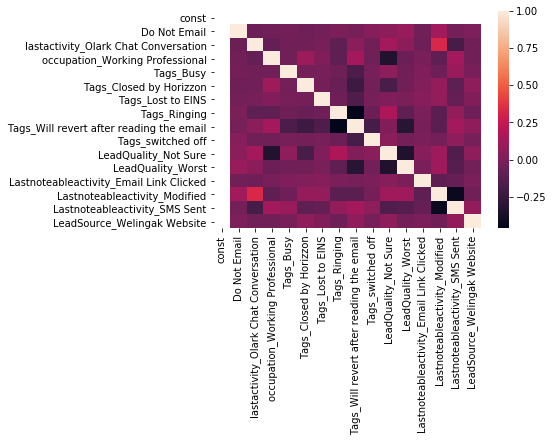

In [1185]:
#Correlaion MAtrix

sns.heatmap(X_train_sm.corr())

#There is no high correlation between the features

In [1115]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1116]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,LeadSource_Welingak Website,3.46
9,LeadQuality_Not Sure,3.32
8,Tags_switched off,1.65
1,lastactivity_Olark Chat Conversation,1.33
5,Tags_Lost to EINS,1.27
2,occupation_Working Professional,1.25
0,Do Not Email,1.17
3,Tags_Busy,1.13
12,Lastnoteableactivity_Modified,1.13
7,Tags_Will revert after reading the email,1.12


In [1117]:
# Getting the predicted values on the train set


y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.276282
1012    0.288066
9226    0.000617
4750    0.787802
7987    0.974573
1281    0.990129
2880    0.276282
4971    0.743670
7536    0.911613
1248    0.000617
dtype: float64

In [1118]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.76282179e-01, 2.88065739e-01, 6.17159328e-04, 7.87801998e-01,
       9.74573394e-01, 9.90128595e-01, 2.76282179e-01, 7.43669862e-01,
       9.11612693e-01, 6.17159328e-04])

In [1119]:
#Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.276282,3009
1,0,0.288066,1012
2,0,0.000617,9226
3,1,0.787802,4750
4,1,0.974573,7987


In [1120]:
# Creating new column 'predicted' with 1 if Converted_prob>0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.276282,3009,0
1,0,0.288066,1012,0
2,0,0.000617,9226,0
3,1,0.787802,4750,1
4,1,0.974573,7987,1


# Model Evaluation

In [1121]:
from sklearn import metrics

In [1122]:
# Confusion matrix 
confusion = confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3751,  154],
       [ 353, 2093]])

In [1123]:
# Summary as under:

# Predicted      not_converted    converted
# Actual
# not_converted           3751         154
# converted                353        2093

In [1124]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9201700519603212


In [1125]:
## Checking VIF

In [1126]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,LeadSource_Welingak Website,3.46
9,LeadQuality_Not Sure,3.32
8,Tags_switched off,1.65
1,lastactivity_Olark Chat Conversation,1.33
5,Tags_Lost to EINS,1.27
2,occupation_Working Professional,1.25
0,Do Not Email,1.17
3,Tags_Busy,1.13
12,Lastnoteableactivity_Modified,1.13
7,Tags_Will revert after reading the email,1.12


In [1127]:
# All VIFs are within range so no issues 

# Other Metrics

In [1128]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1129]:
# Sensitivity of logistic regression model
TP / float(TP+FN)

0.8556827473426002

In [1130]:
# Specificity of logistic regression model

TN / float(TN+FP)

0.9605633802816902

In [1131]:
# Calculate false postive rate - predicting converstion when customer does not convert
print(FP/ float(TN+FP))

0.03943661971830986


In [1132]:
# positive predictive value 
print (TP / float(TP+FP))

0.9314641744548287


In [1133]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9139863547758285


# ROC Curve

In [1134]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

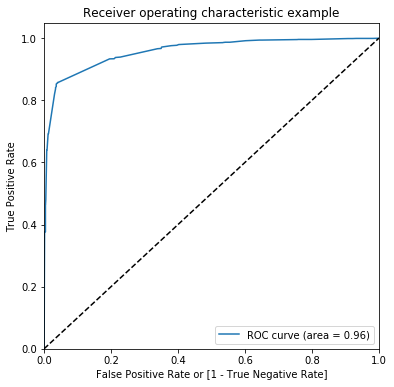

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 2.56081946e-04, 2.56081946e-04,
        2.56081946e-04, 2.56081946e-04, 2.56081946e-04, 2.56081946e-04,
        2.56081946e-04, 2.56081946e-04, 2.56081946e-04, 2.56081946e-04,
        2.56081946e-04, 2.56081946e-04, 5.12163892e-04, 5.12163892e-04,
        5.12163892e-04, 5.12163892e-04, 5.12163892e-04, 7.68245839e-04,
        7.68245839e-04, 7.68245839e-04, 7.68245839e-04, 7.68245839e-04,
        7.68245839e-04, 7.68245839e-04, 1.28040973e-03, 1.53649168e-03,
        4.09731114e-03, 4.09731114e-03, 4.09731114e-03, 4.09731114e-03,
        4.09731114e-03, 4.09731114e-03, 4.09731114e-03, 4.09731114e-03,
        4.09731114e-03, 4.09731114e-03, 4.09731114e-03, 4.09731114e-03,
        4.35339309e-03, 5.12163892e-03, 5.12163892e-03, 5.12163892e-03,
        5.12163892e-03, 5.12163892e-03, 5.37772087e-03, 5.377720

In [1135]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [1136]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

'0.96'

# Finding Optimal Cutoff Point

In [1137]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.276282,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.288066,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.000617,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.787802,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.974573,7987,1,1,1,1,1,1,1,1,1,1,1


In [1138]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','preci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,preci]
print(cutoff_df)

     prob  accuracy     sensi     speci     preci
0.0   0.0  0.385136  1.000000  0.000000  0.385136
0.1   0.1  0.762715  0.974652  0.629962  0.622617
0.2   0.2  0.844906  0.937858  0.786684  0.733610
0.3   0.3  0.919855  0.857727  0.958771  0.928730
0.4   0.4  0.919698  0.856909  0.959027  0.929078
0.5   0.5  0.920170  0.855683  0.960563  0.931464
0.6   0.6  0.920170  0.850777  0.963636  0.936122
0.7   0.7  0.917651  0.840965  0.965685  0.938841
0.8   0.8  0.872304  0.687244  0.988220  0.973364
0.9   0.9  0.856243  0.639411  0.992061  0.980564


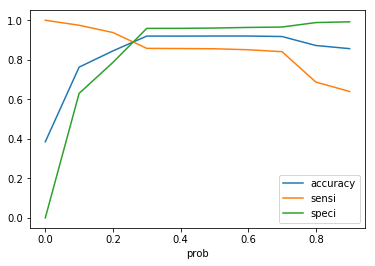

In [1139]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1140]:
#From the curve above, 0.3 is the optimum point to take it as a cutoff probability

In [1141]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.276282,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.288066,1012,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.000617,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.787802,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.974573,7987,1,1,1,1,1,1,1,1,1,1,1,1


# Lead Score Assignment

In [1142]:
y_train_pred_final['Lead_Score Assigned'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score Assigned
0,0,0.276282,3009,0,1,1,1,0,0,0,0,0,0,0,0,28
1,0,0.288066,1012,0,1,1,1,0,0,0,0,0,0,0,0,29
2,0,0.000617,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.787802,4750,1,1,1,1,1,1,1,1,1,0,0,1,79
4,1,0.974573,7987,1,1,1,1,1,1,1,1,1,1,1,1,97


## Other Metrics

In [1143]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9201700519603212

In [1144]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1145]:
# Sensitivity of logistic regression model
TP / float(TP+FN)

0.8556827473426002

In [1146]:
# Let us calculate specificity
TN / float(TN+FP)

0.9605633802816902

In [1147]:
# Calculate false postive rate - predicting conversion when customer does not convert
print(FP/ float(TN+FP))

0.03943661971830986


In [1148]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9314641744548287


In [1149]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9139863547758285


## Precision and Recall

In [1150]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3751,  154],
       [ 353, 2093]])

In [1151]:
#Precision
#TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9314641744548287

In [1152]:
#Recall¶
#TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8556827473426002

## Precision and recall tradeoff

In [1153]:
from sklearn.metrics import precision_recall_curve

In [1154]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [1155]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

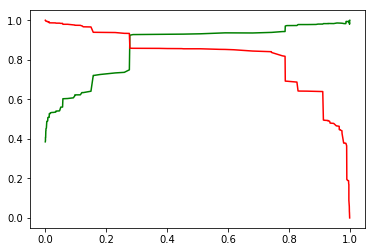

In [1156]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [1157]:
# based on the above 0.3 seems to be most optimum cut off

# Making predictions on the test set

In [1158]:
# Standardize the Data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,lastactivity_Email Bounced,lastactivity_Email Link Clicked,lastactivity_Email Opened,lastactivity_Form Submitted on Website,lastactivity_Olark Chat Conversation,...,LeadOrigin_Lead Add Form,LeadOrigin_Lead Import,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Other Sources,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website
3009,0,0,-0.432779,-0.160255,-0.155018,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7987,0,0,0.643547,2.017593,0.122613,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1159]:
X_test = X_test[col1]
X_test.head()

,Do Not Email,lastactivity_Olark Chat Conversation,occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,LeadQuality_Not Sure,LeadQuality_Worst,Lastnoteableactivity_Email Link Clicked,Lastnoteableactivity_Modified,Lastnoteableactivity_SMS Sent,LeadSource_Welingak Website
3271,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1490,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
7936,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
4216,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3830,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [1160]:
X_test_sm = sm.add_constant(X_test)

## Making predictions on the test set

In [1161]:
y_test_pred = res.predict(X_test_sm)

In [1162]:
y_test_pred[:10]

3271    0.276282
1490    0.975029
7936    0.276282
4216    0.997428
3830    0.276282
1800    0.975029
6507    0.012816
4821    0.000729
4223    0.990129
4714    0.150094
dtype: float64

In [1163]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1164]:
# Let's see the head
y_pred_1.head()

,0
3271,0.276282
1490,0.975029
7936,0.276282
4216,0.997428
3830,0.276282


In [1165]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1166]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [1167]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1168]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1169]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.276282
1,1,1490,0.975029
2,0,7936,0.276282
3,1,4216,0.997428
4,0,3830,0.276282


In [1170]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [1171]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_prob'], axis=1)

In [1172]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,0.276282
1,1490,1,0.975029
2,7936,0,0.276282
3,4216,1,0.997428
4,3830,0,0.276282


In [1173]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [1174]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,0.276282,0
1,1490,1,0.975029,1
2,7936,0,0.276282,0
3,4216,1,0.997428,1
4,3830,0,0.276282,0


In [1175]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9140653690782226

In [1176]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1659,   75],
       [ 159,  830]])

In [1177]:
TP1 = confusion2[1,1] # true positive 
TN1 = confusion2[0,0] # true negatives
FP1 = confusion2[0,1] # false positives
FN1 = confusion2[1,0] # false negatives

In [1178]:
# Let's see the sensitivity of our logistic regression model
TP1 / float(TP1+FN1)

0.839231547017189

In [1179]:
# Let us calculate specificity
TN1 / float(TN1+FP1)

0.9567474048442907

In [1180]:
#Precision

confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.9171270718232044

In [1181]:
#Recall¶
#TP / TP + FN
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.839231547017189